Connecting to my drive inorder to access the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importing neccessary libraries

In [2]:
import pandas as pd
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [6]:
# Path to the zip file containing the images
images_path = "/content/drive/MyDrive/horizontal_bateria"

# Path to the CSV file containing image filenames and points data
csv_file_path = '/content/drive/MyDrive/300_Bacteria_images.csv'

# Read the CSV file containing the points information
df = pd.read_csv(csv_file_path)


Reading the first few rows of excel file from the VGG website inorder to provide an overview of the content

In [7]:
df.head()

filename  file_size  \
0   Box_2_Acidic_022_5_641.jpg       1093   
1   Box_2_Acidic_022_5_641.jpg       1093   
2   Box_2_Acidic_028_1_918.jpg       1270   
3   Box_2_Acidic_028_1_918.jpg       1270   
4  Box_2_Acidic_032_4_1021.jpg       1132   

                                     file_attributes  region_count  region_id  \
0  {"caption":"","public_domain":"no","image_url"...             2          0   
1  {"caption":"","public_domain":"no","image_url"...             2          1   
2  {"caption":"","public_domain":"no","image_url"...             2          0   
3  {"caption":"","public_domain":"no","image_url"...             2          1   
4  {"caption":"","public_domain":"no","image_url"...             2          0   

            region_shape_attributes  \
0   {"name":"point","cx":1,"cy":15}   
1  {"name":"point","cx":71,"cy":18}   
2   {"name":"point","cx":3,"cy":14}   
3  {"name":"point","cx":83,"cy":19}   
4   {"name":"point","cx":1,"cy":15}   

                                   region_attributes  
0  {"name":"not_defined","type":"unknown","image_...  
1  {"name":"not_defined","type":"unknown","image_...  
2  {"name":"not_defined","type":"unknown","image_...  
3  {"name":"not_defined","type":"unknown","image_...  
4  {"name":"not_defined","type":"unknown","image_...

This script processes a DataFrame that contains image filenames and corresponding coordinate points, storing these points in a dictionary for each image. It begins by iterating through each row of the DataFrame, extracting the filename and coordinates from the `region_shape_attributes` column, and storing them in a dictionary where the keys are filenames and the values are lists of points. After constructing the dictionary, the script prints it for debugging purposes and saves it as a JSON file for future reference. The script also includes a function called `annotate_images`, which loads images from a specified directory, annotates them by drawing the stored points onto the images, and then displays the annotated images using `matplotlib`. Finally, the `annotate_images` function is executed, looping through the dictionary to annotate and display each image, allowing for a visual verification of the accuracy of the points.

Points Dictionary: {'Box_2_Acidic_022_5_641.jpg': [(1, 15), (71, 18)], 'Box_2_Acidic_028_1_918.jpg': [(3, 14), (83, 19)], 'Box_2_Acidic_032_4_1021.jpg': [(1, 15), (66, 15)], 'Box_2_Acidic_046_2_1055.jpg': [(1, 15), (60, 15)], 'Box_2_Acidic_052_4_1678.jpg': [(3, 15), (58, 13)], 'Box_2_Acidic_056_6_1363.jpg': [(2, 19), (50, 14)], 'Box_2_Acidic_060_2_1887.jpg': [(0, 24), (64, 12)], 'Box_2_Acidic_062_1_2725.jpg': [(2, 13), (84, 17)], 'Box_2_Acidic_062_2_2738.jpg': [(2, 17), (61, 15)], 'Box_2_Acidic_062_2_2739.jpg': [(1, 19), (69, 13)], 'Box_2_Acidic_062_4_2771.jpg': [(1, 14), (36, 13)], 'Box_2_Acidic_064_1_2096.jpg': [(2, 13), (57, 15)], 'Box_2_Acidic_064_3_2119.jpg': [(3, 17), (80, 14)], 'Box_2_Acidic_064_6_2167.jpg': [(2, 14), (87, 16)], 'Box_2_Acidic_064_6_2170.jpg': [(1, 11), (83, 15)], 'Box_2_Acidic_066_3_2216.jpg': [(1, 13), (103, 16)], 'Box_2_Acidic_066_4_2227.jpg': [(1, 16), (67, 14)], 'Box_2_Acidic_066_4_2228.jpg': [(0, 14), (83, 18)], 'Box_2_Acidic_066_4_2234.jpg': [(0, 13), (54,

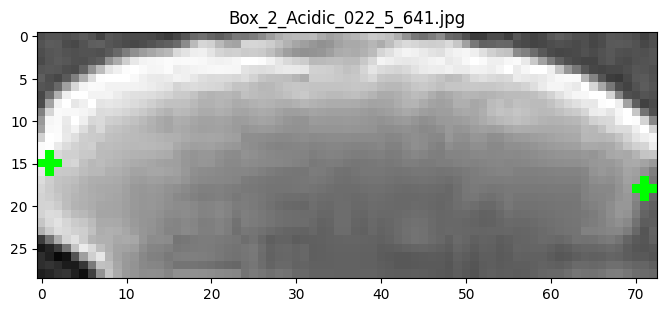

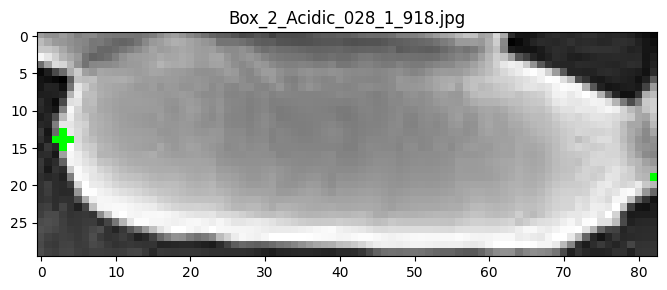

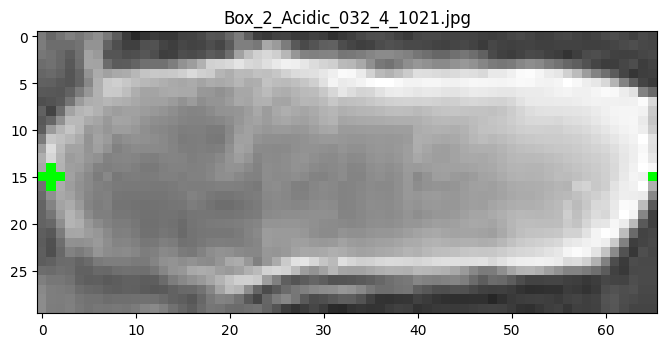

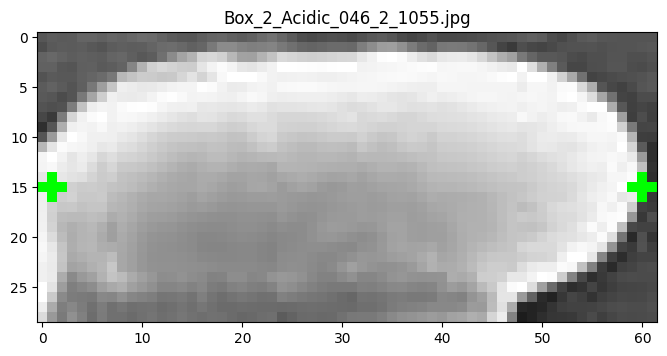

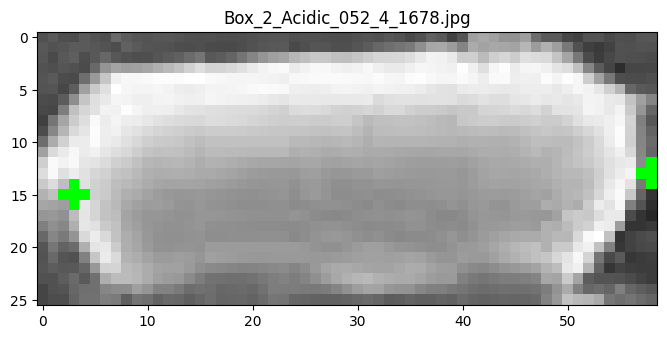

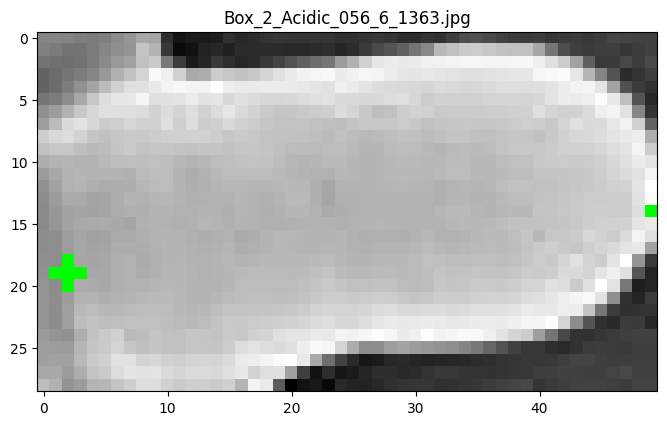

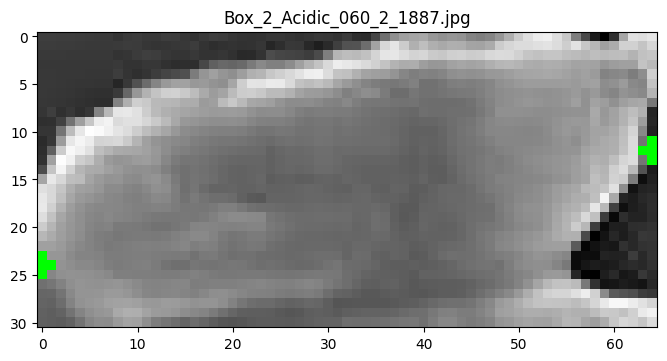

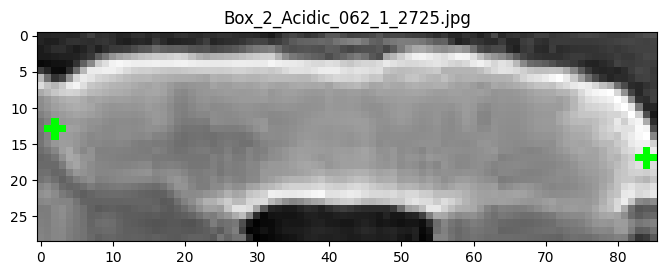

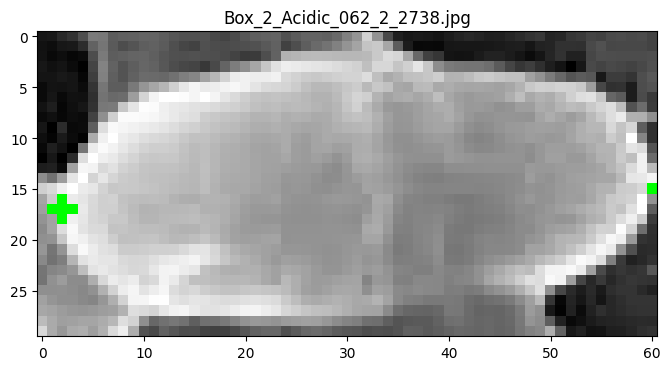

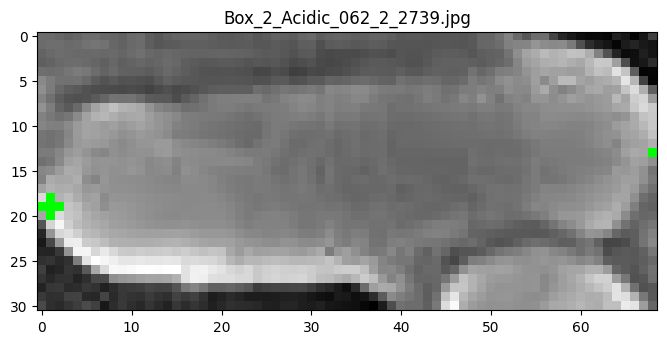

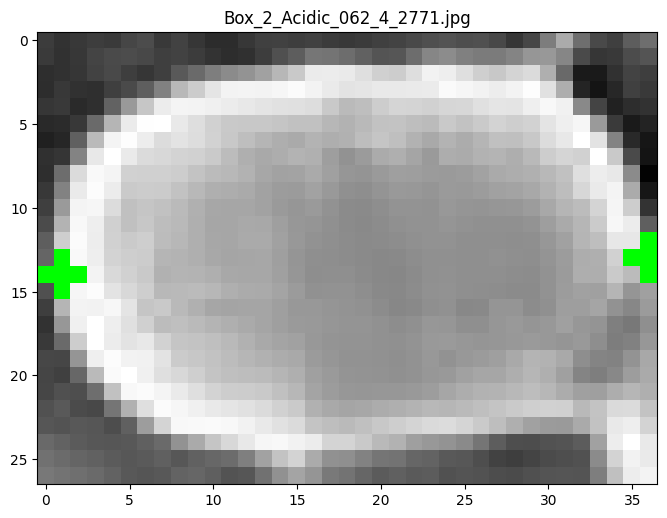

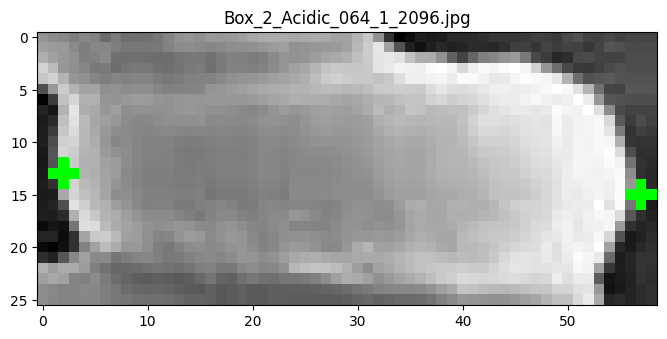

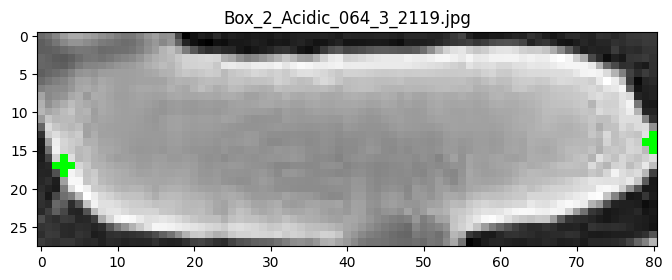

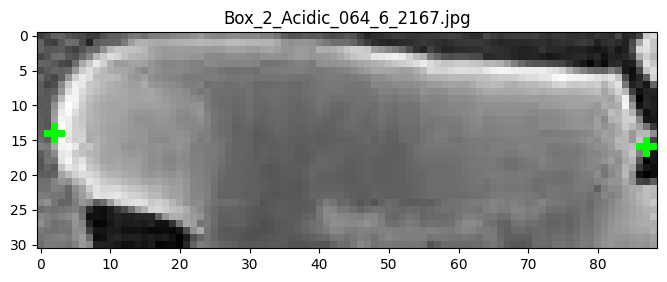

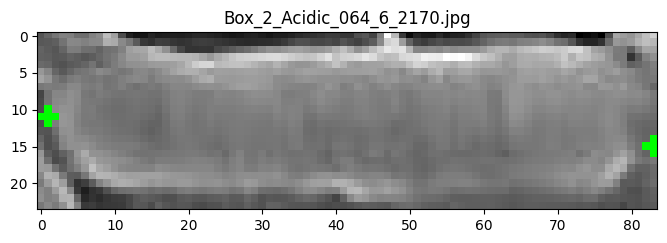

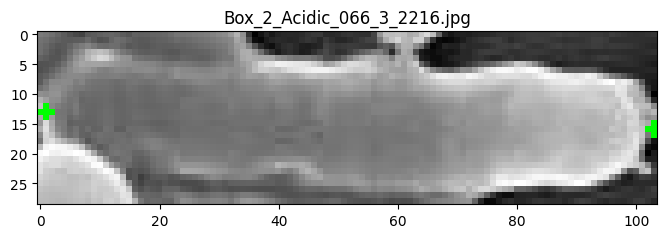

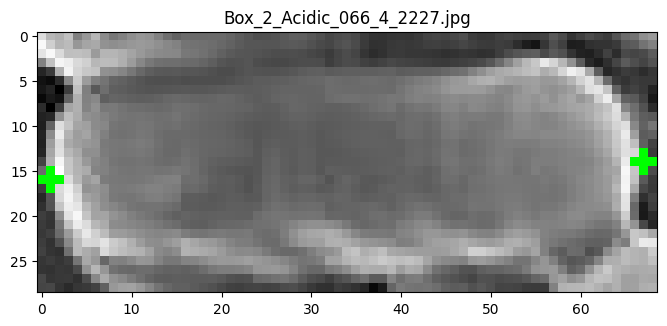

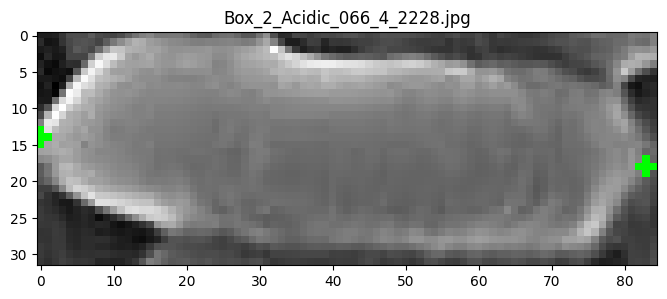

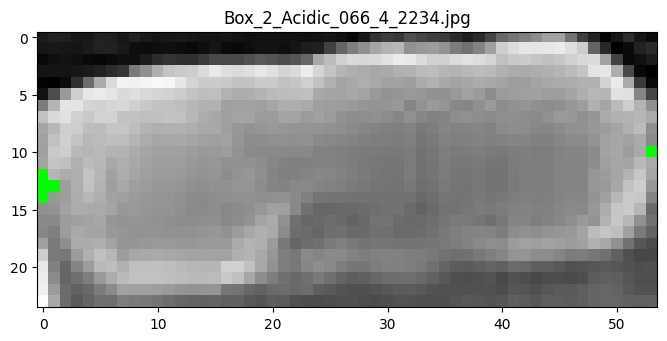

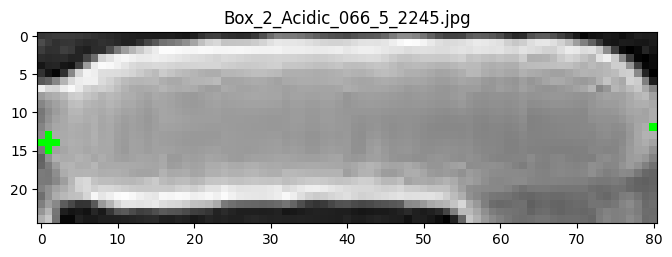

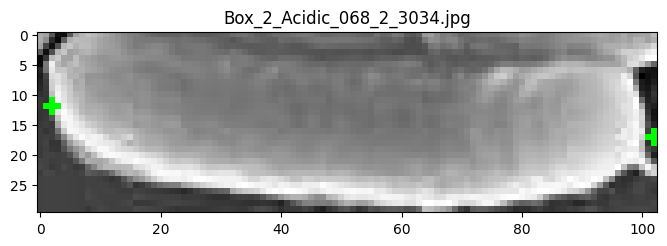

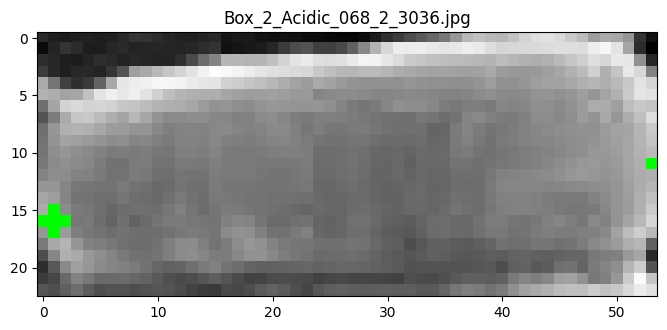

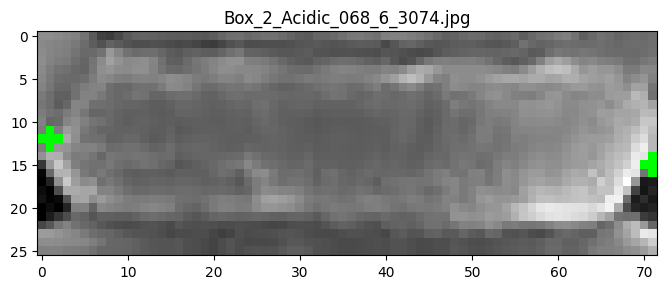

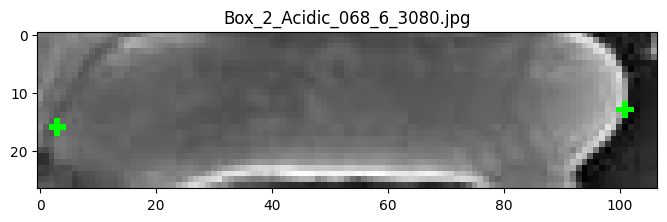

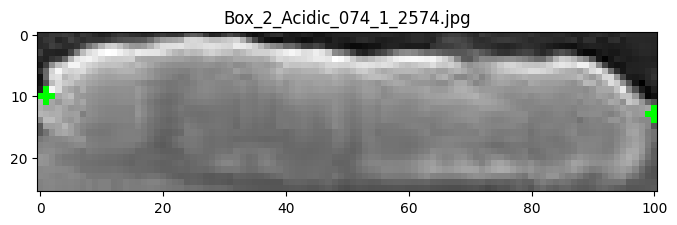

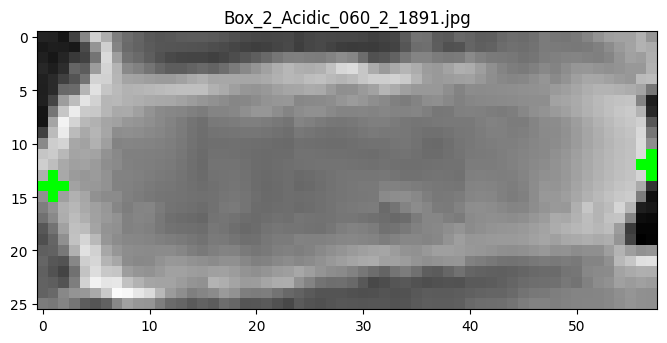

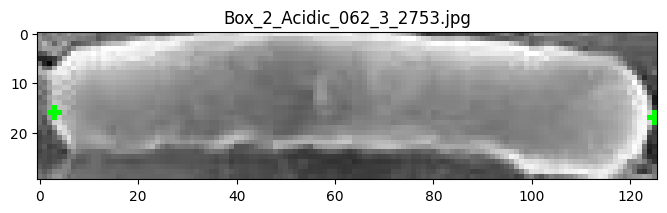

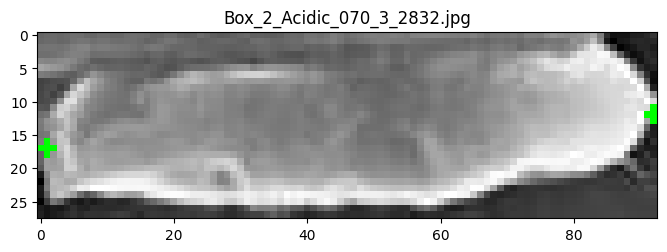

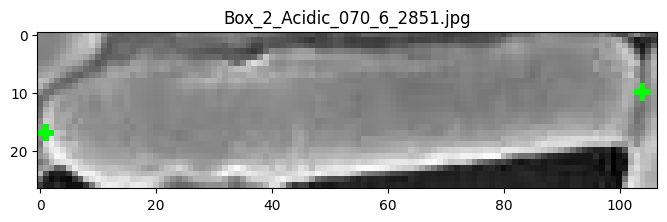

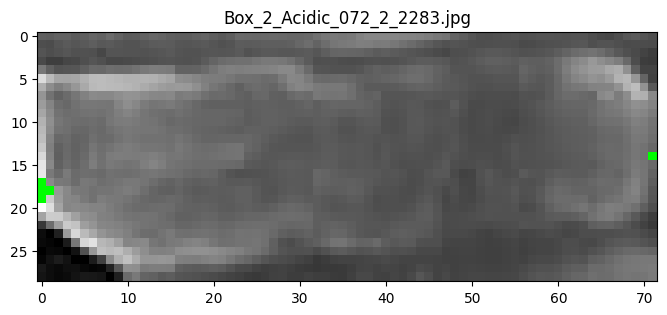

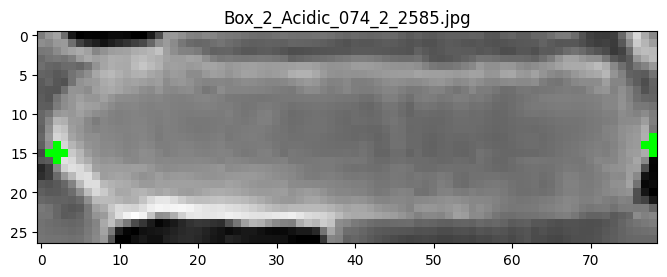

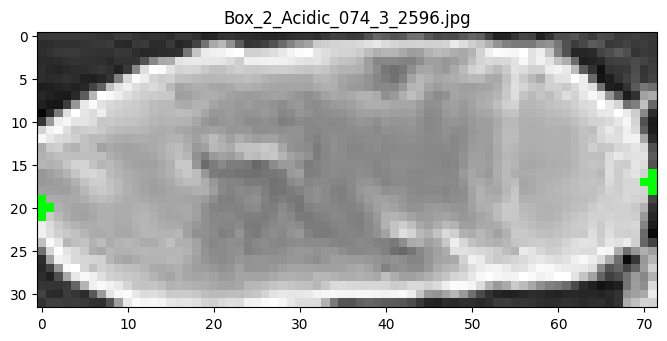

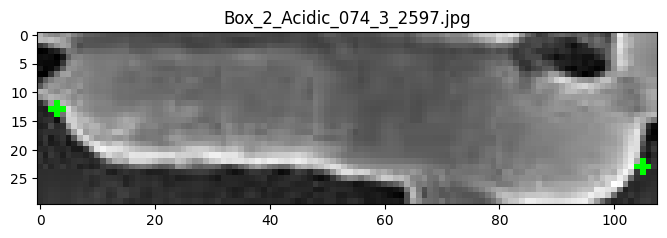

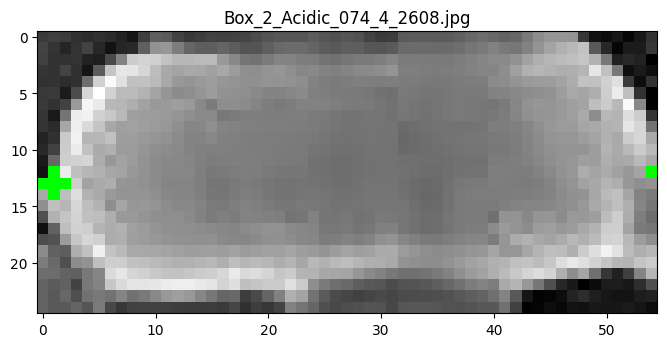

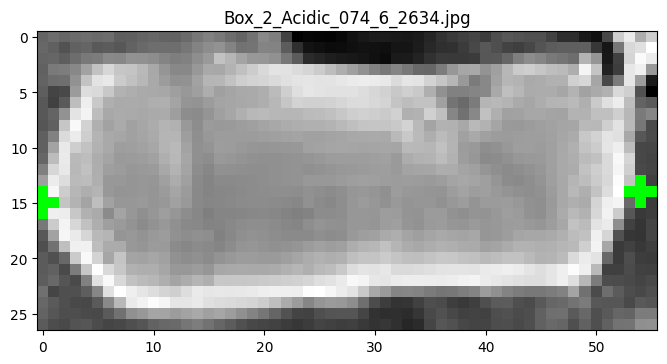

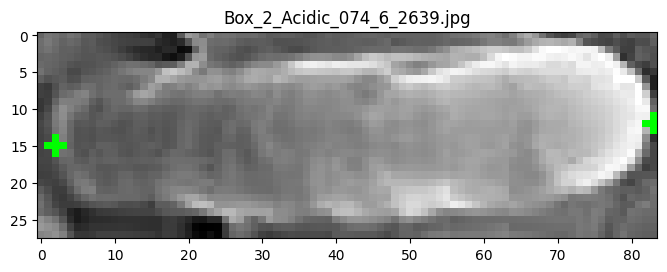

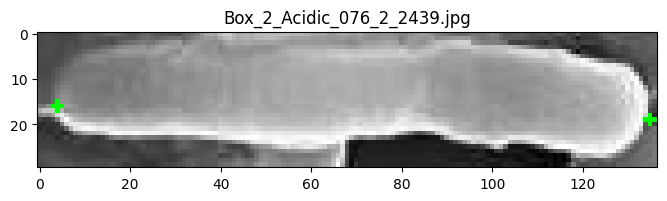

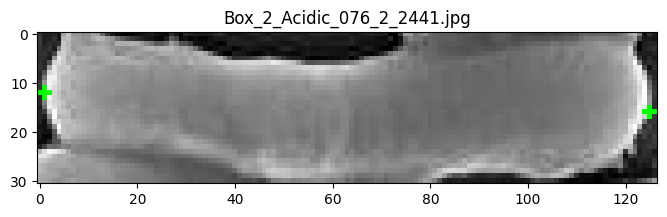

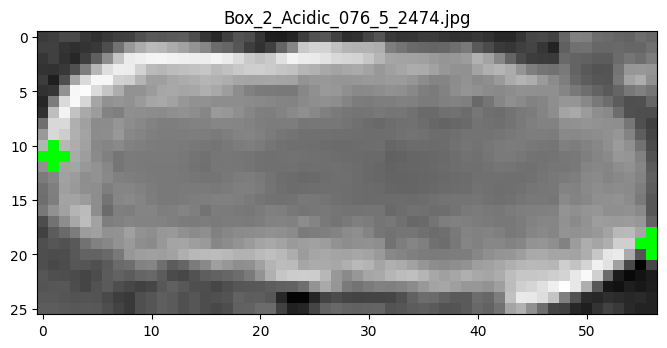

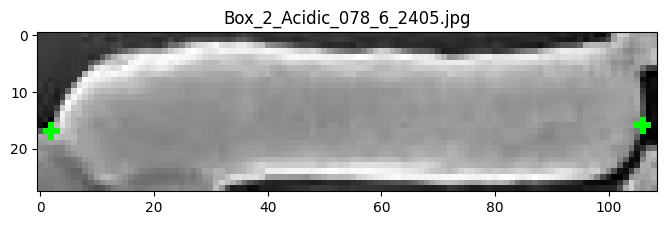

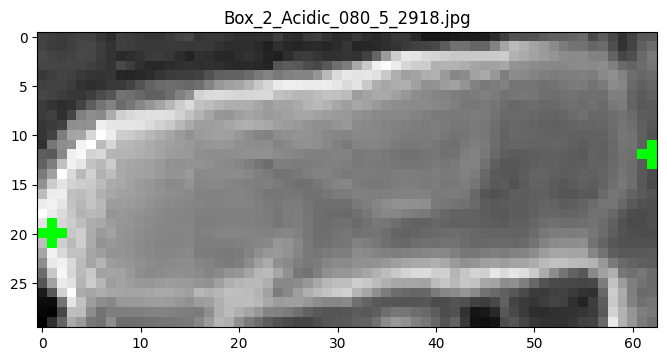

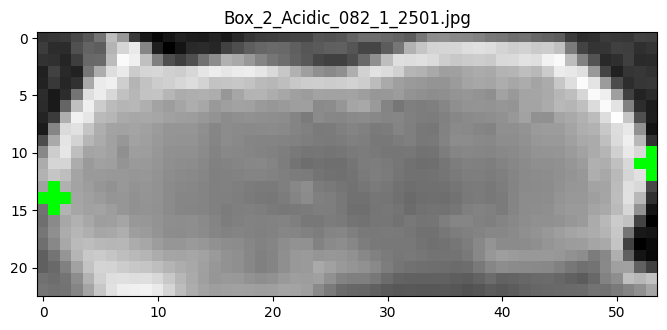

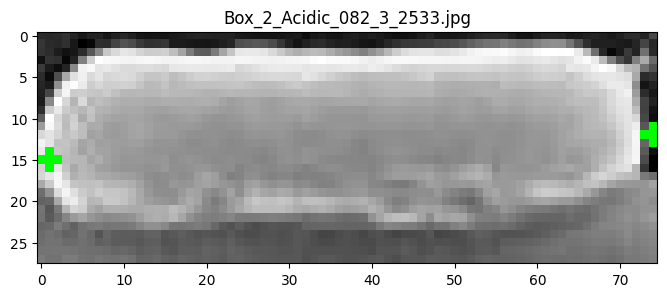

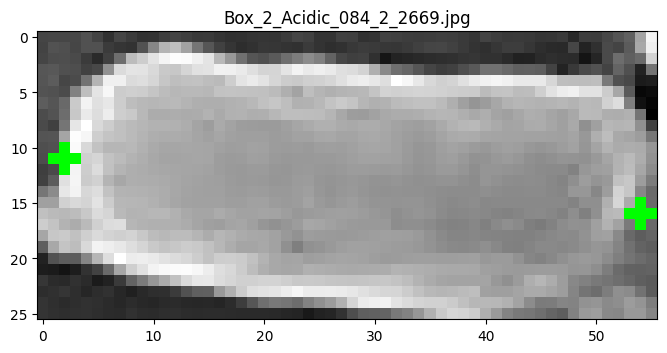

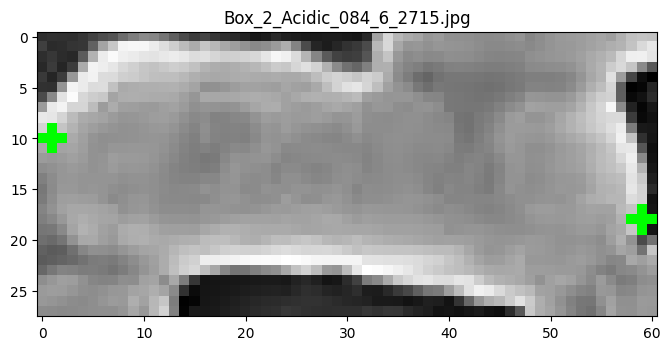

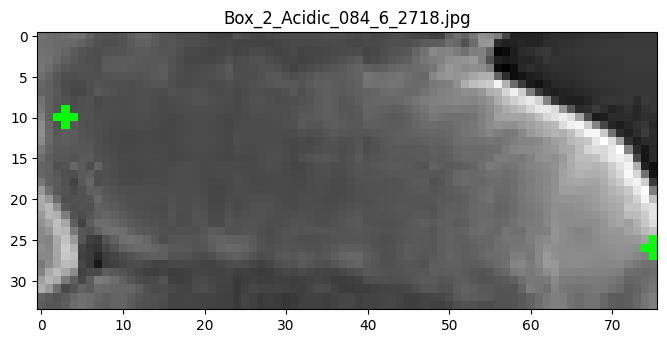

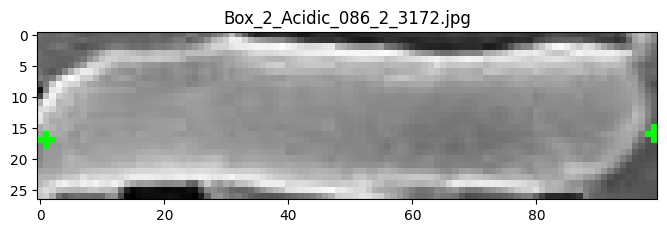

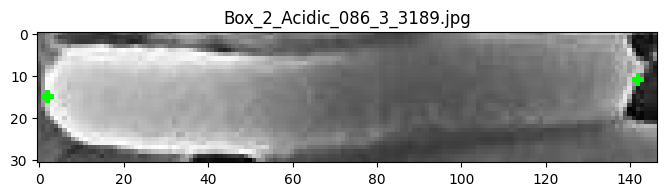

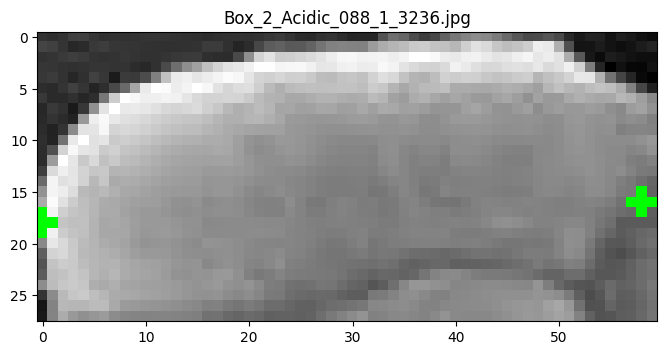

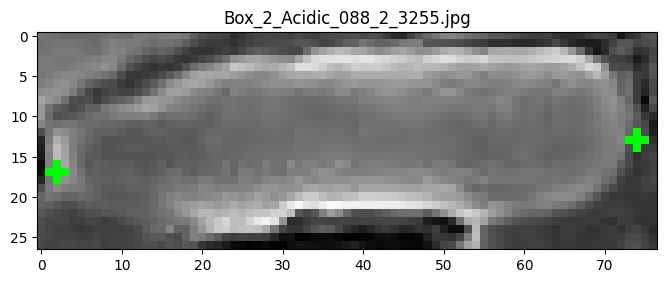

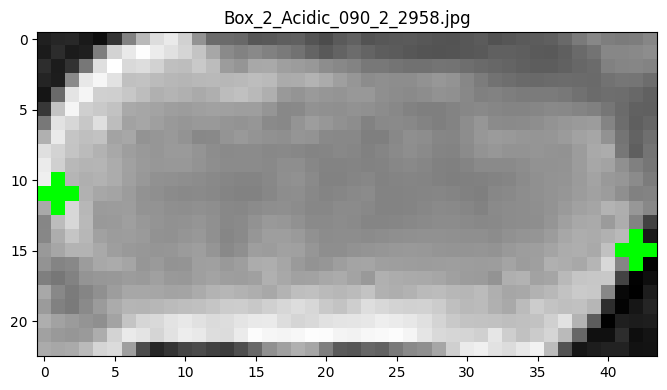

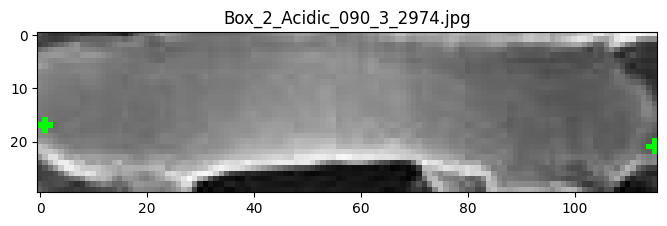

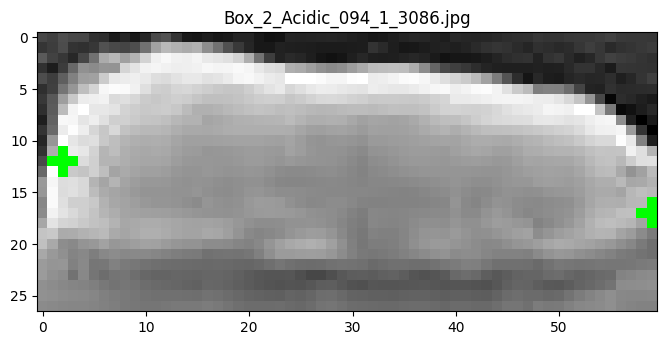

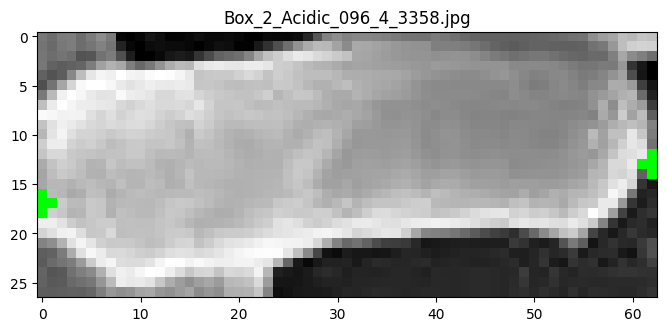

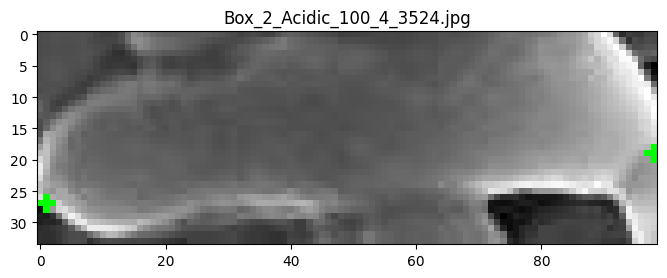

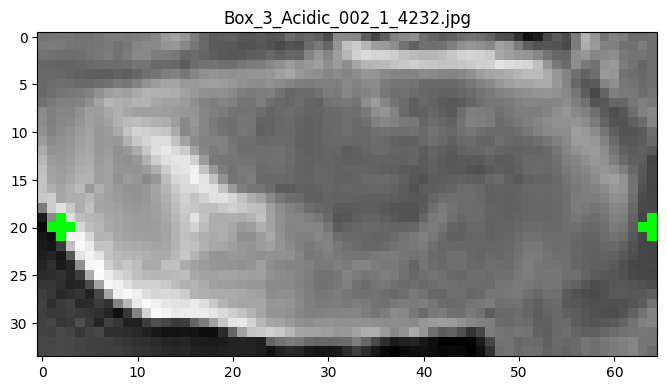

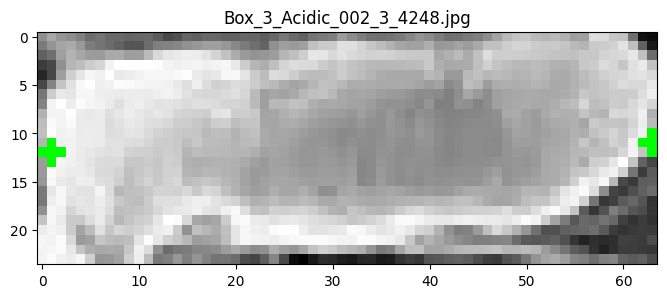

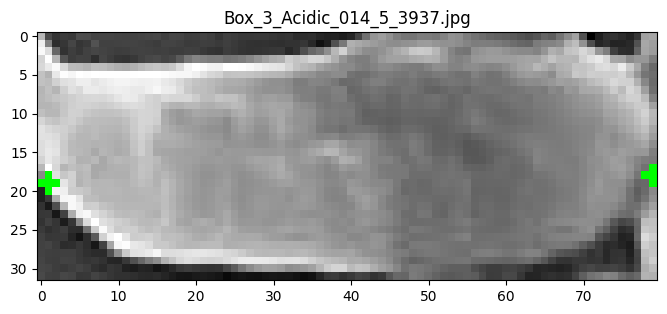

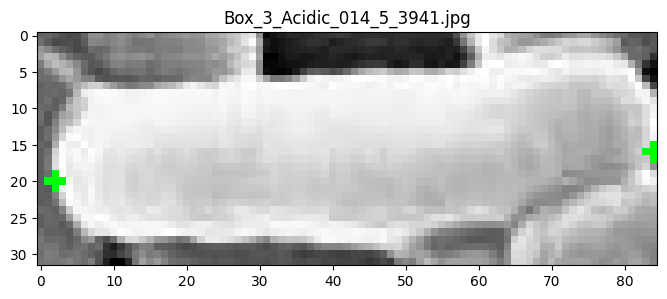

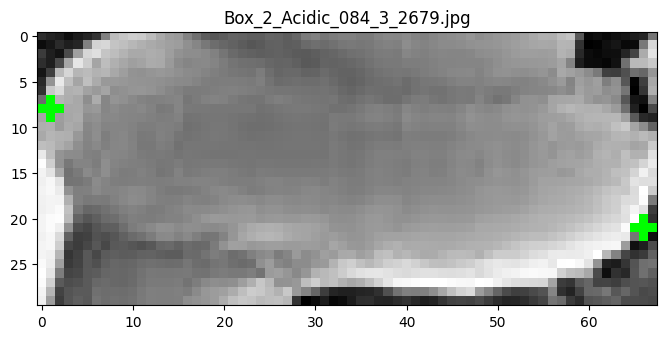

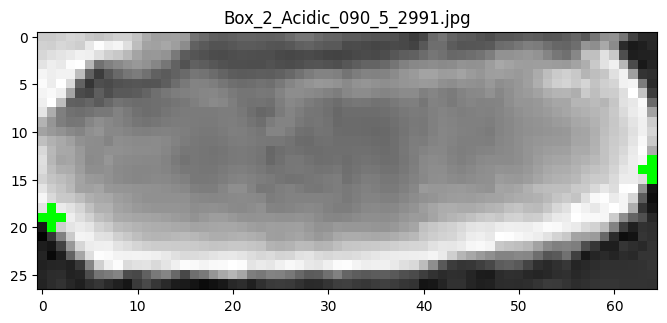

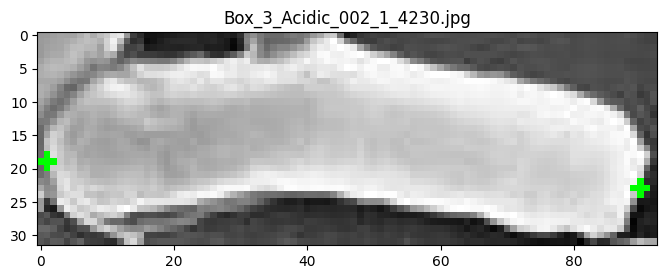

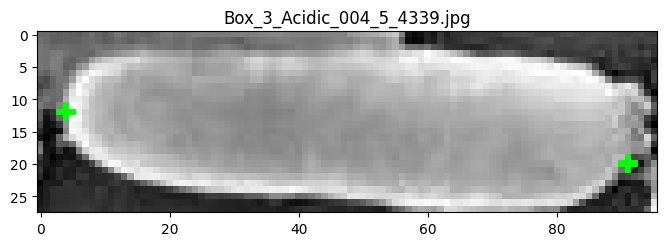

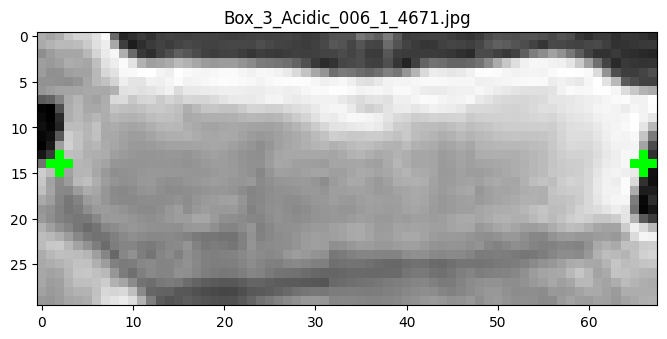

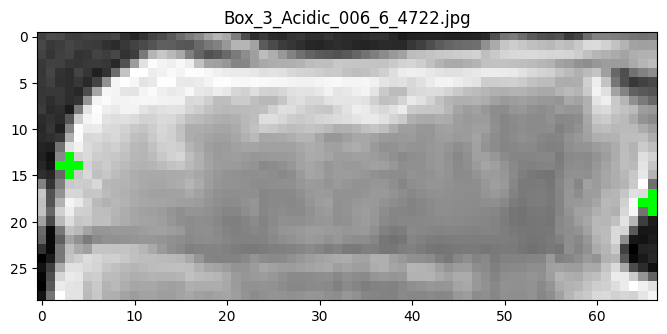

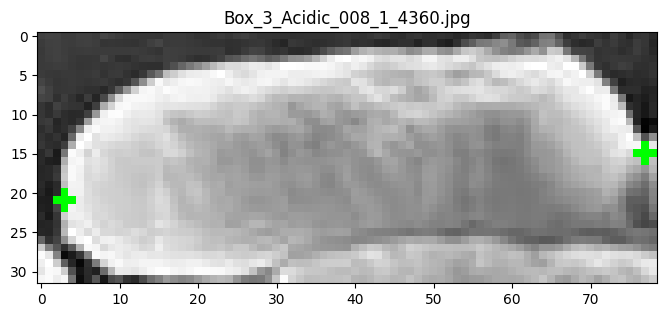

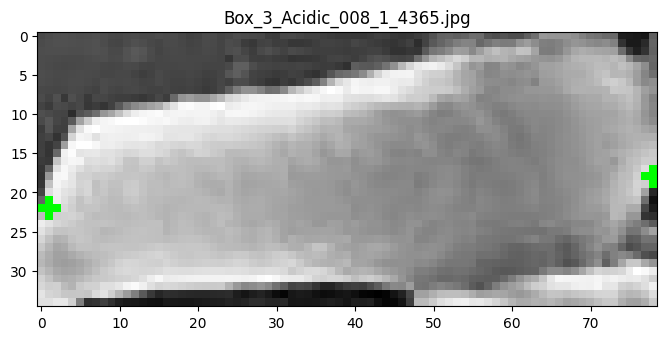

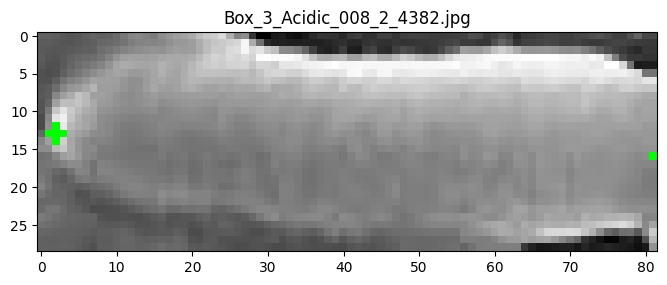

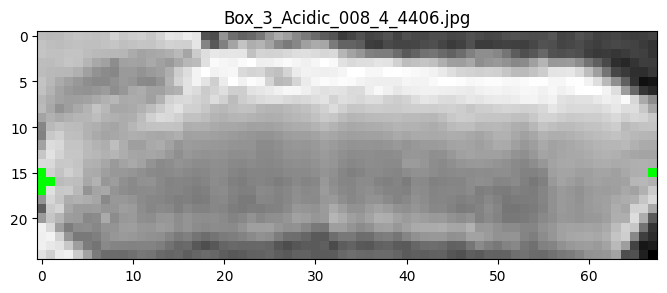

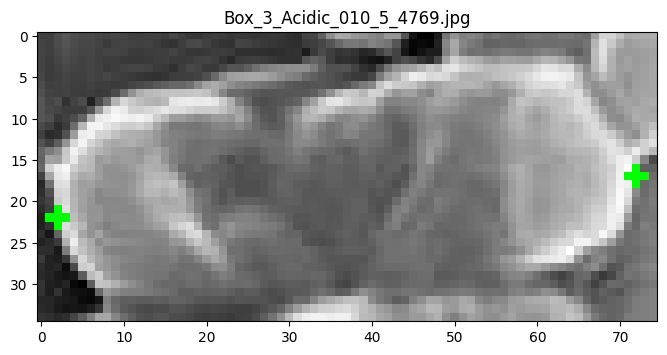

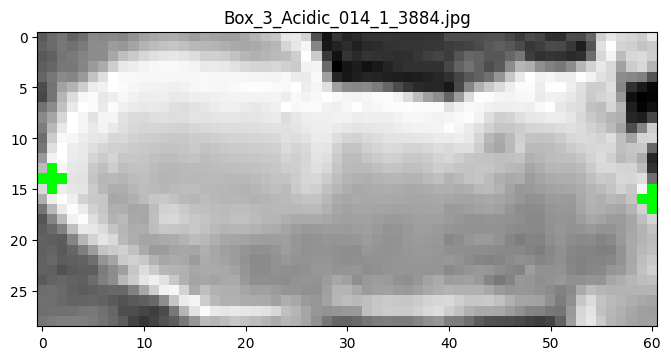

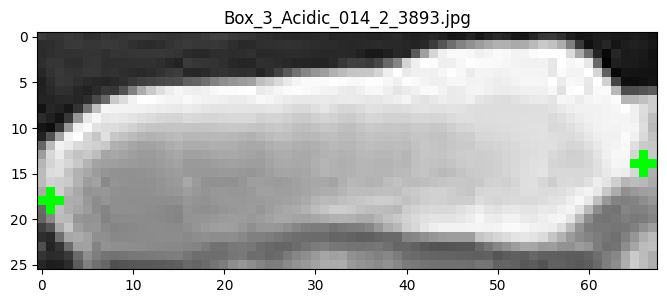

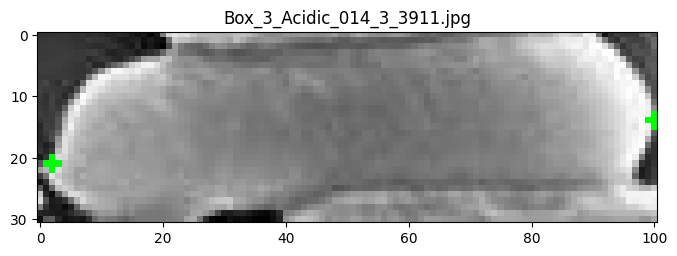

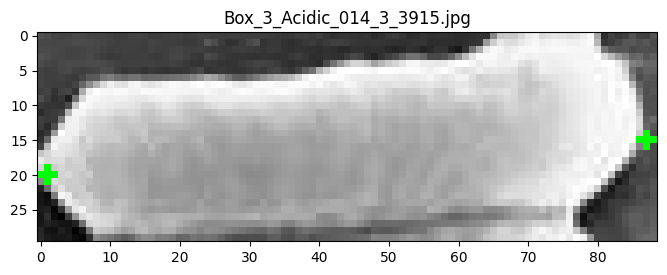

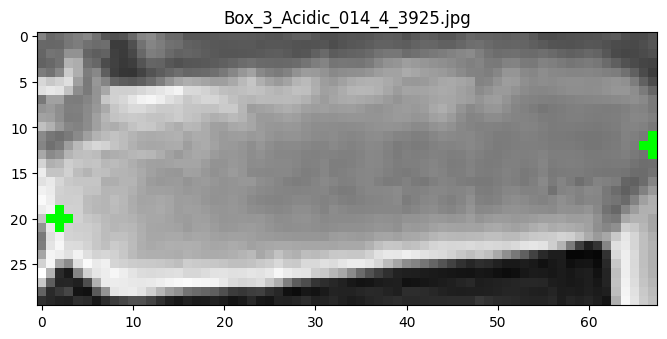

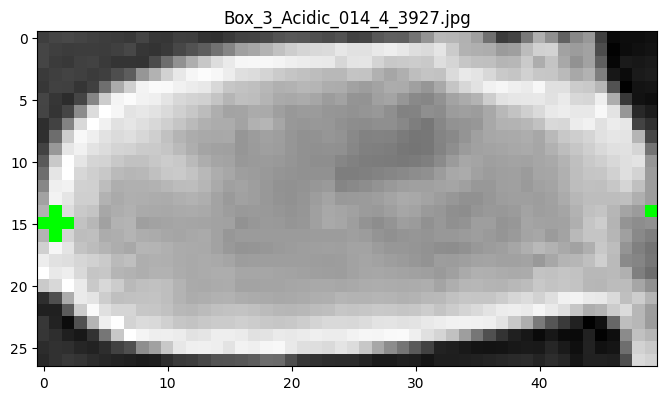

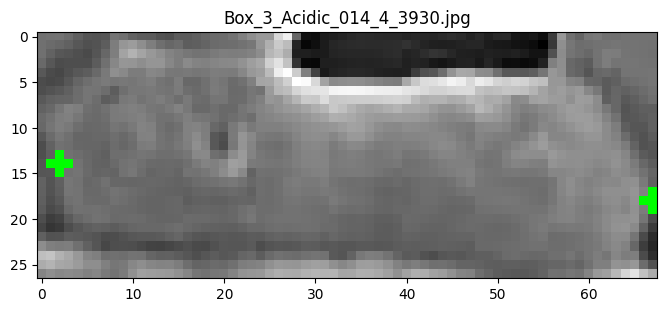

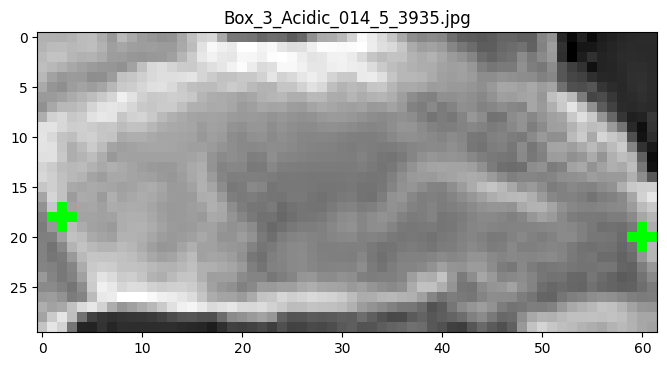

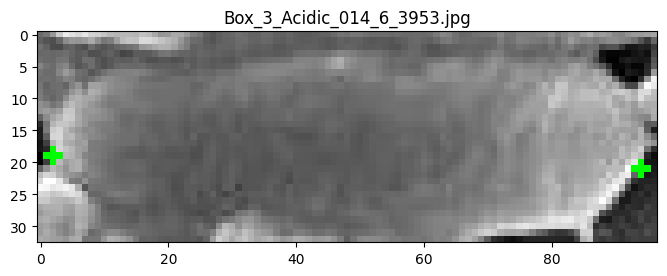

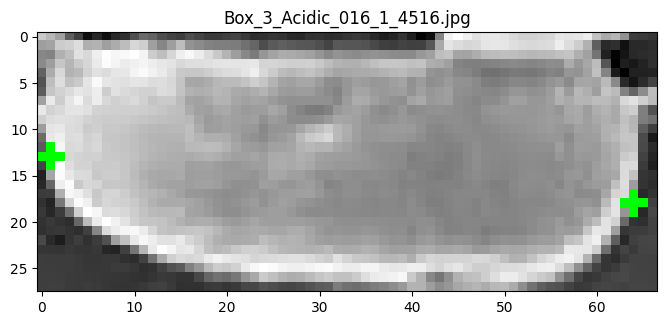

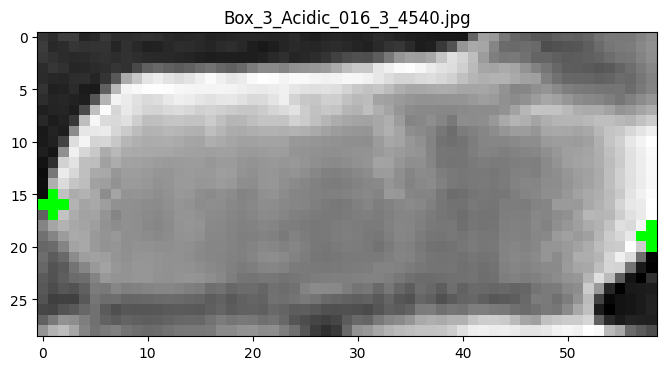

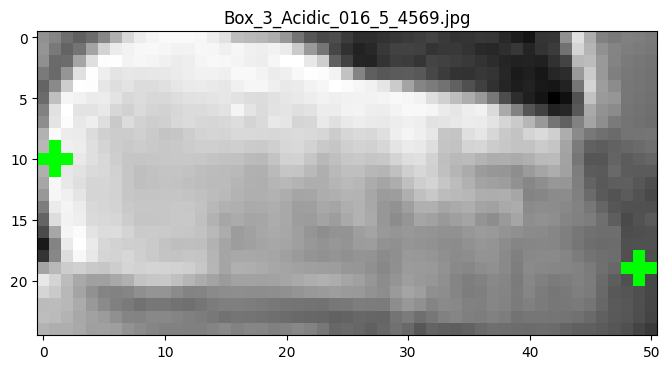

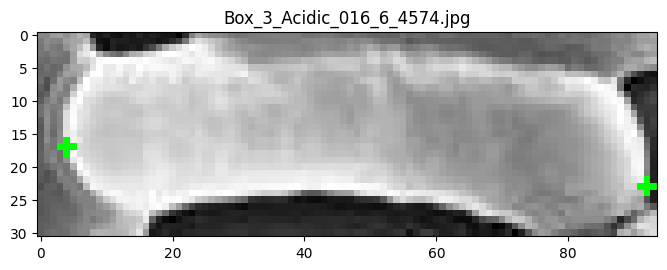

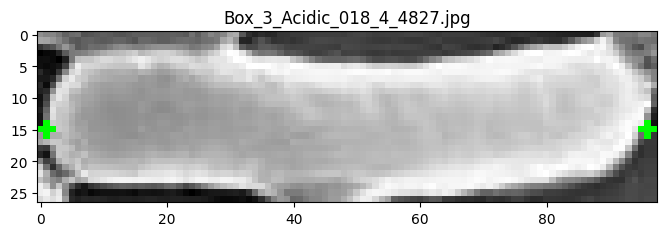

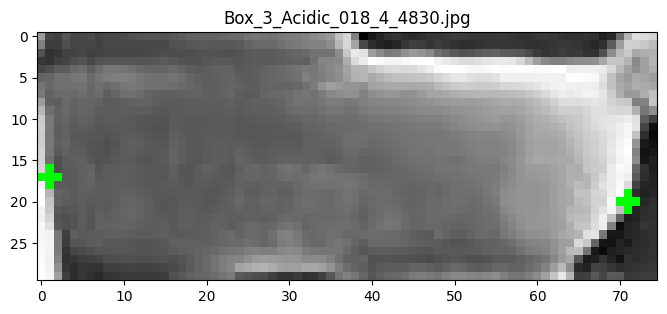

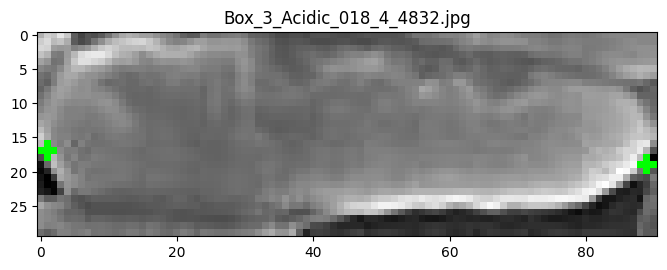

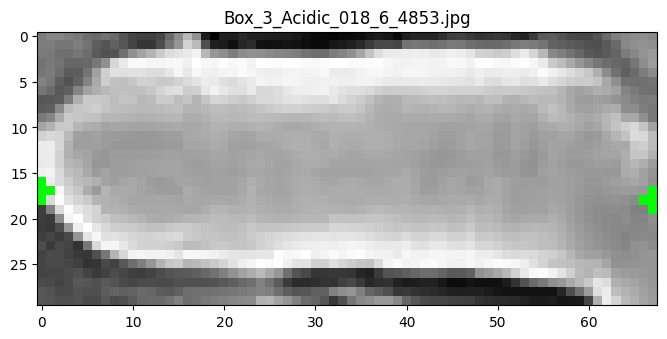

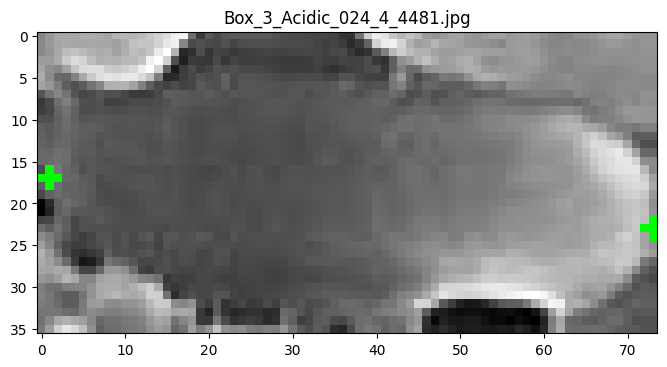

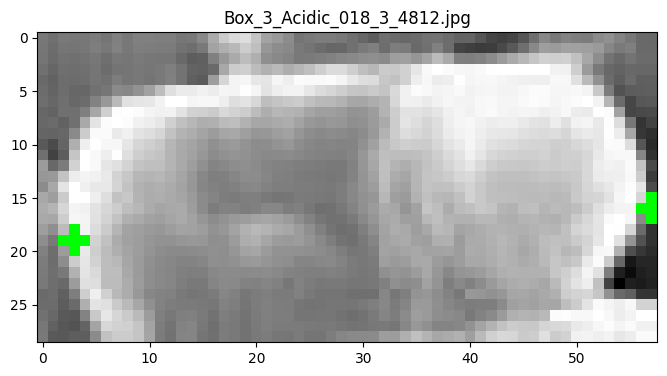

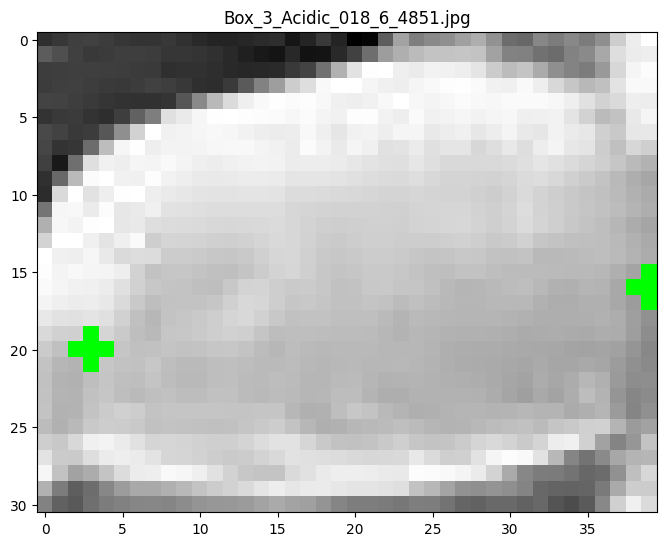

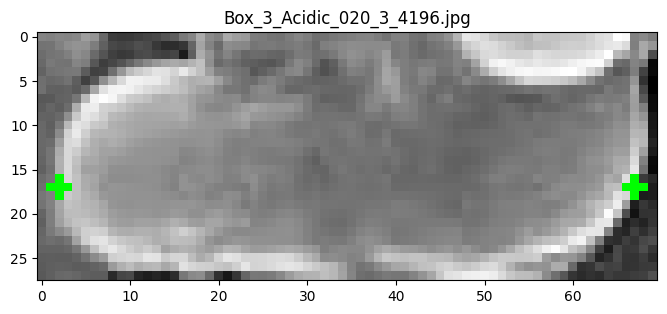

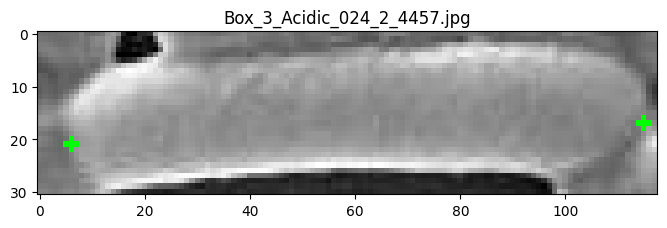

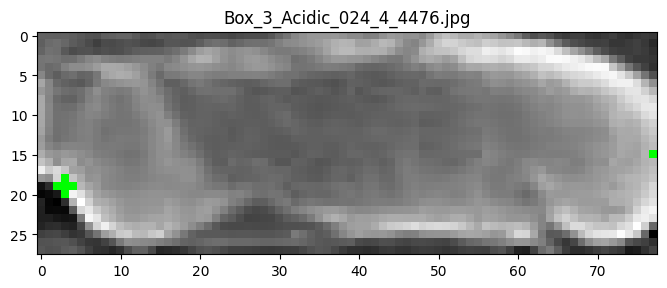

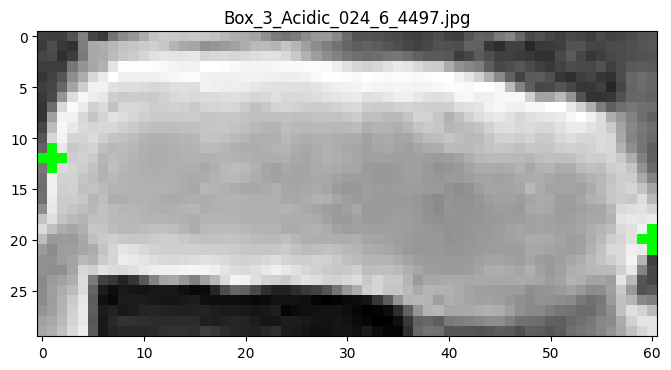

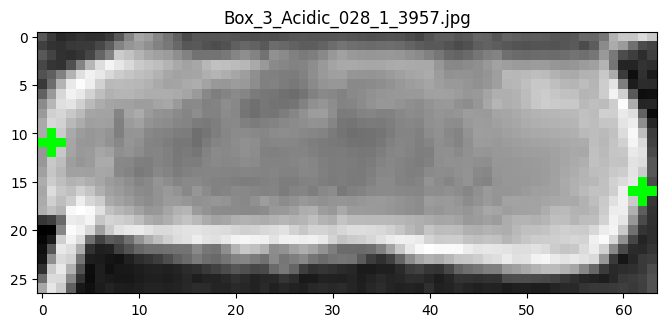

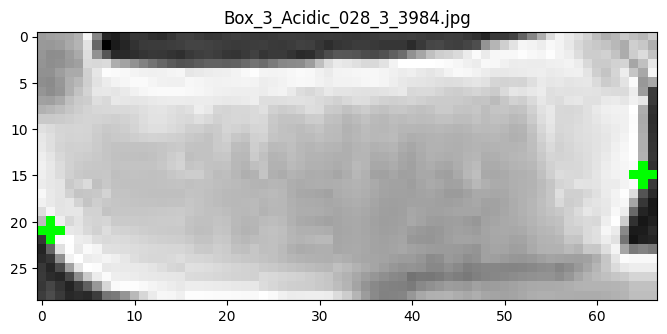

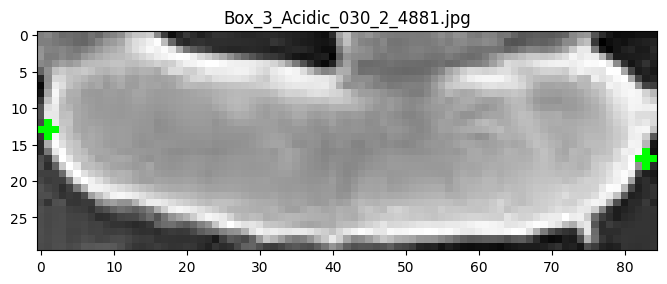

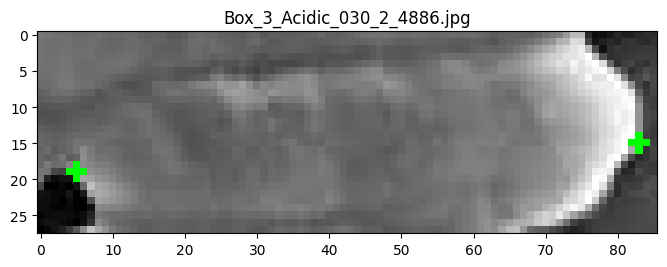

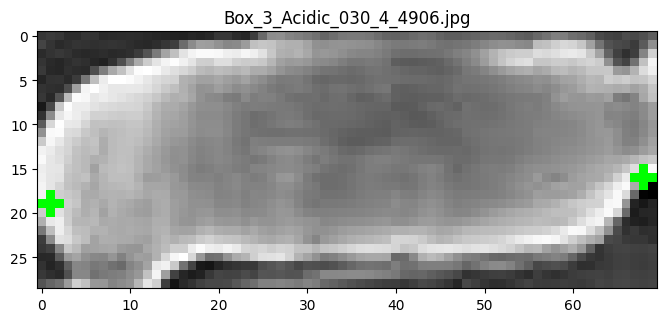

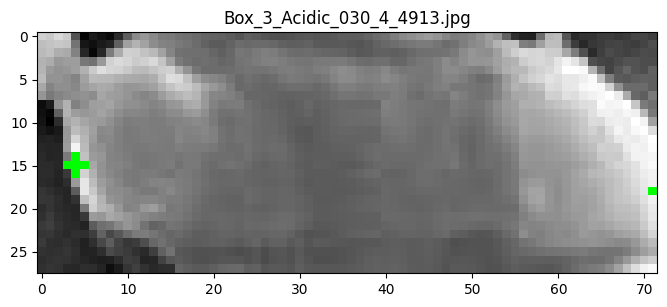

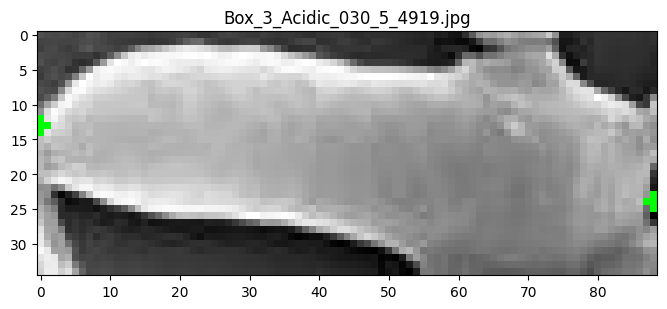

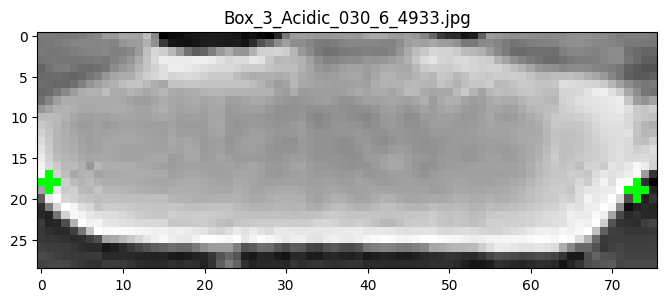

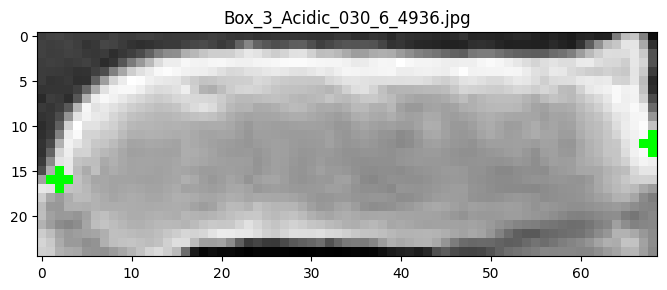

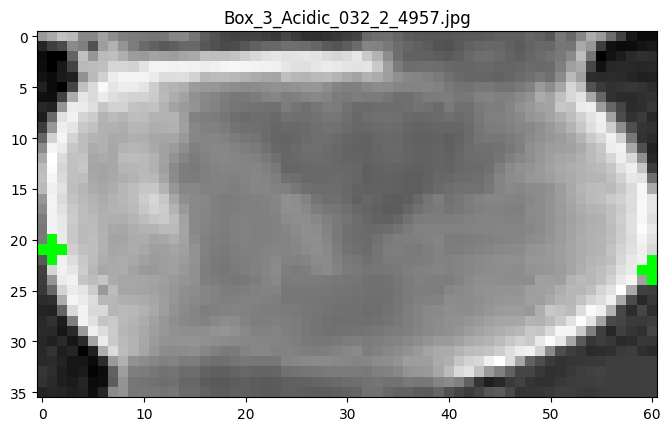

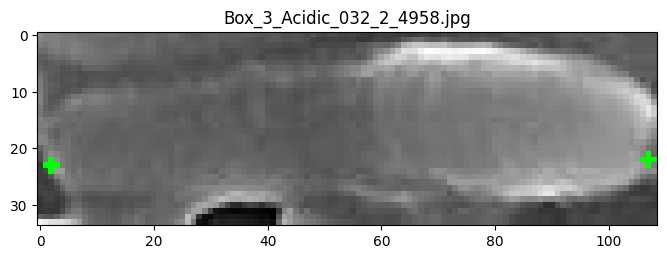

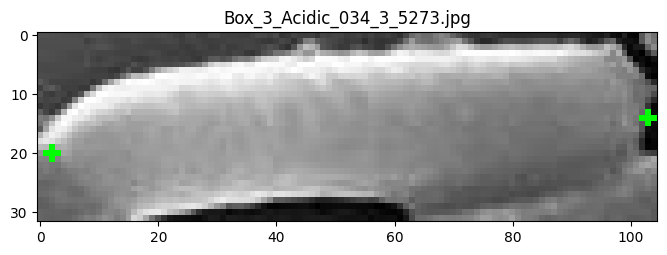

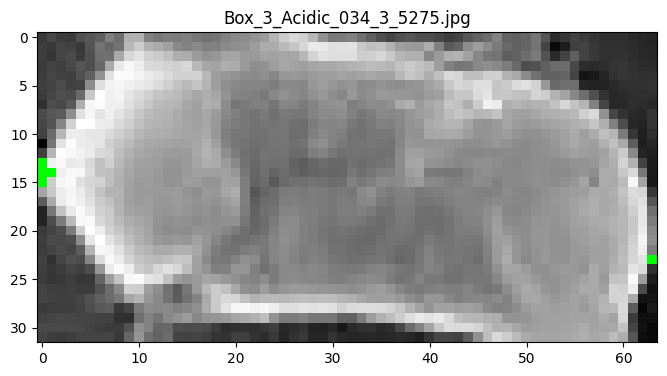

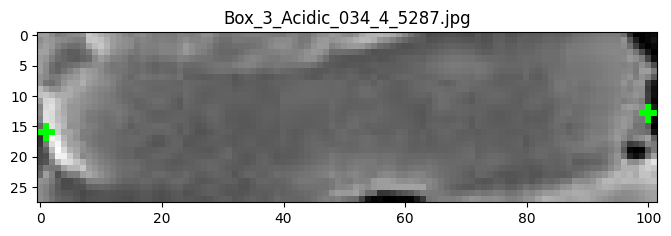

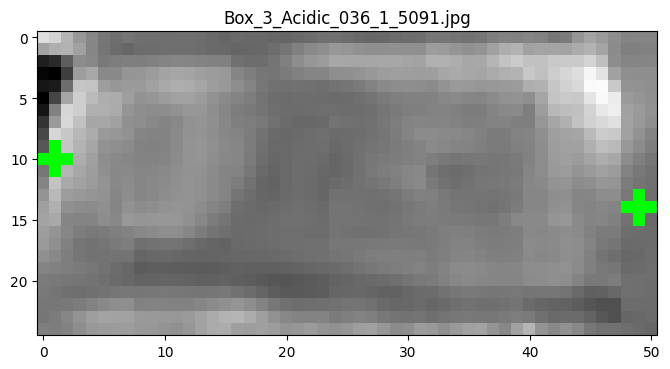

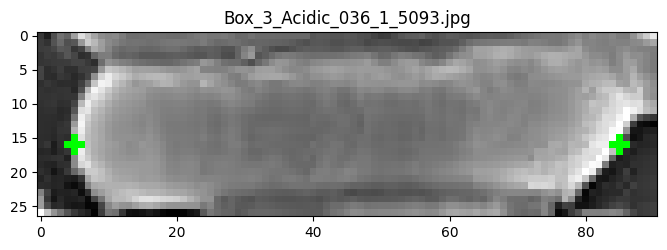

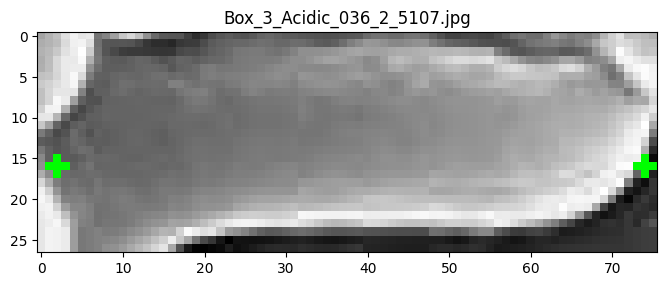

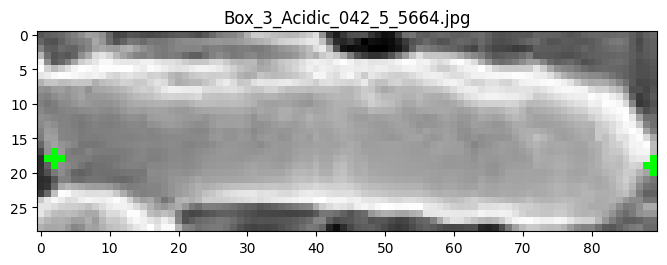

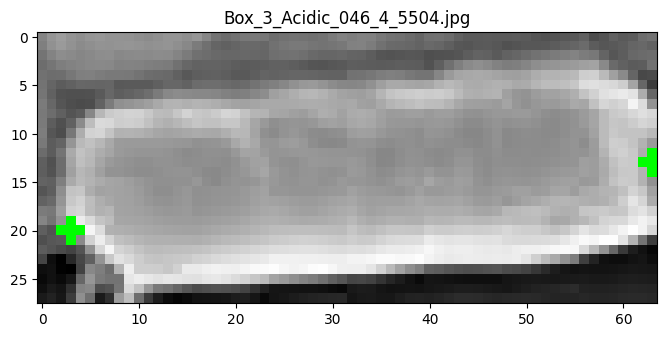

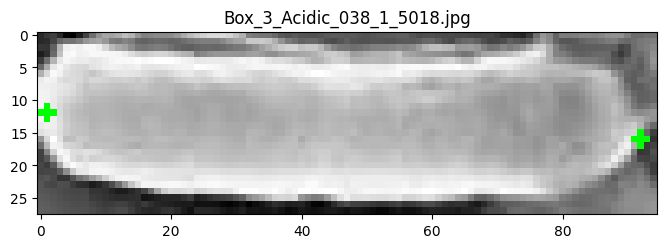

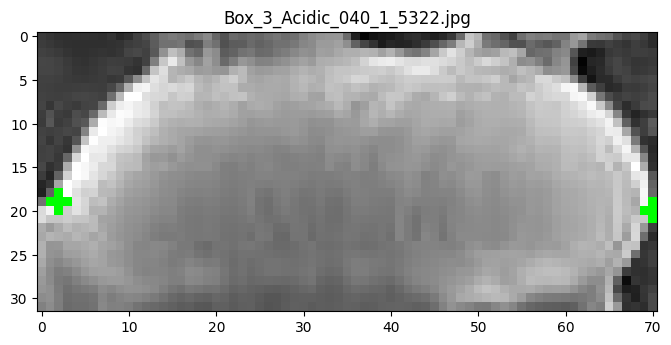

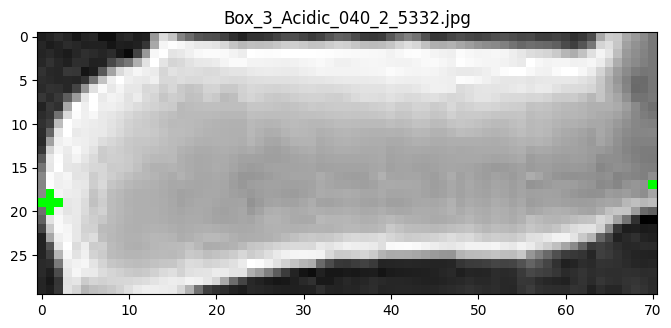

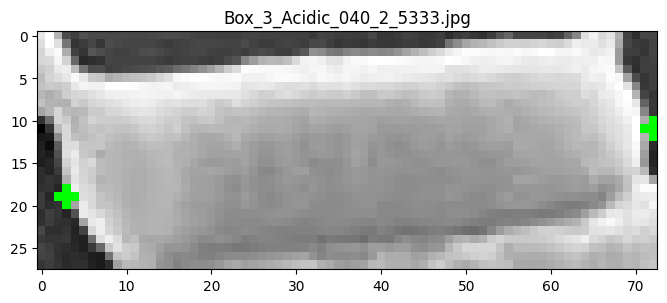

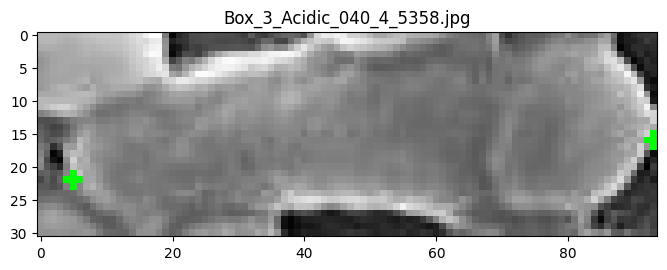

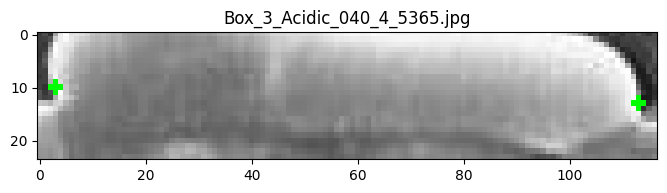

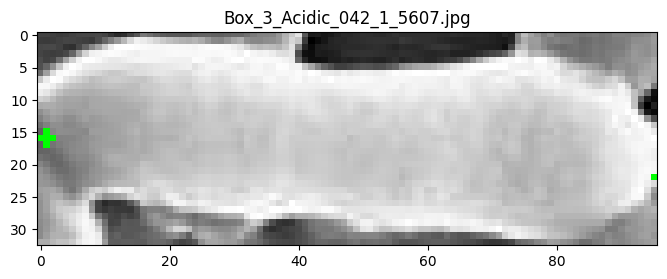

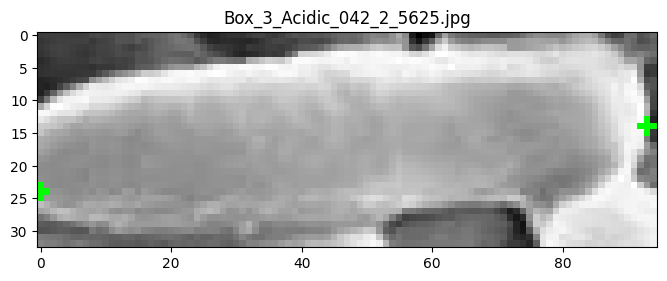

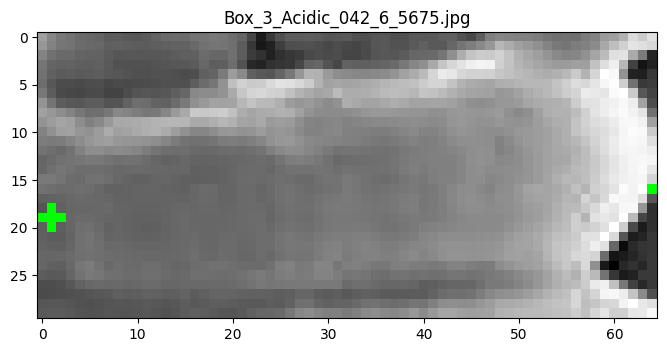

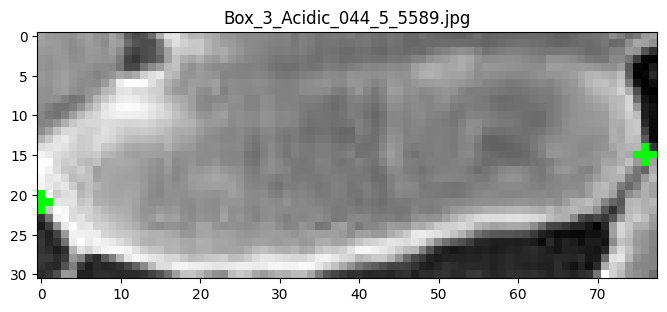

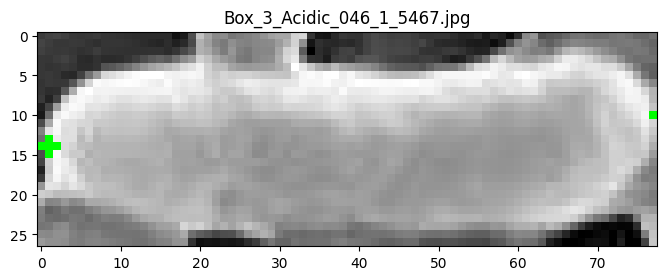

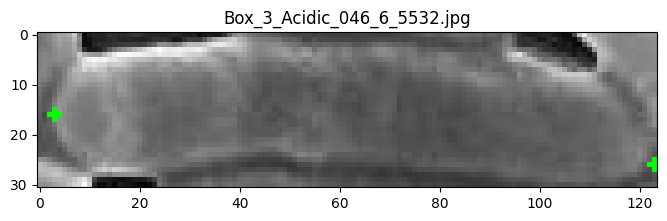

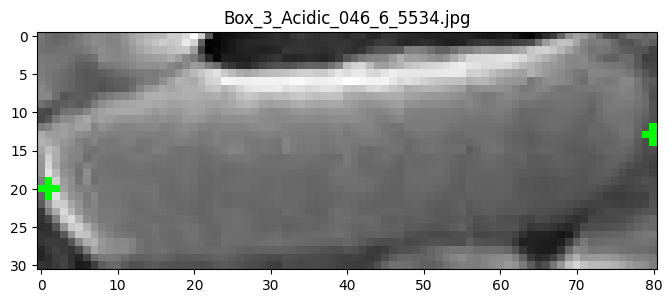

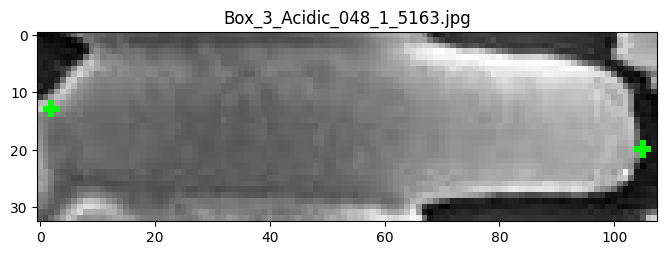

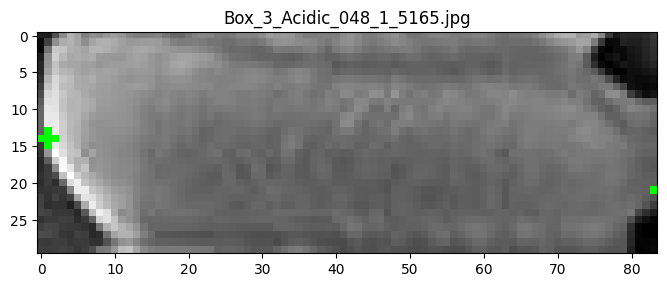

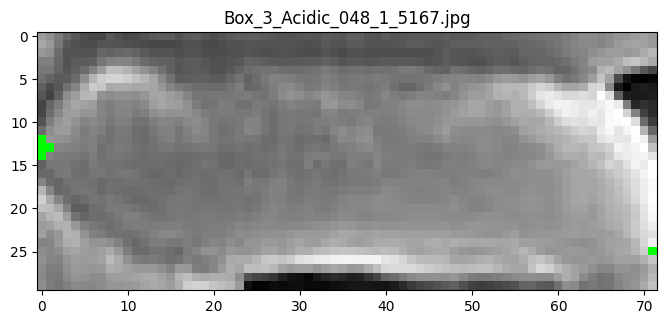

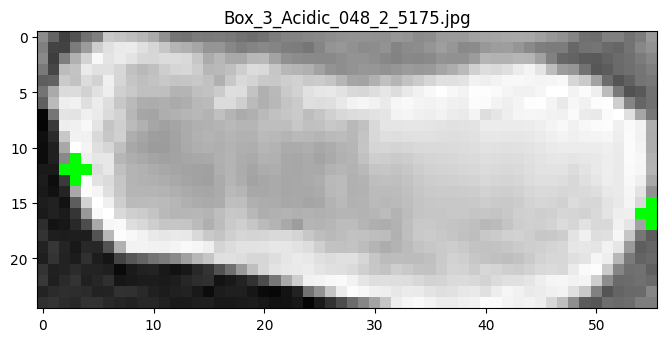

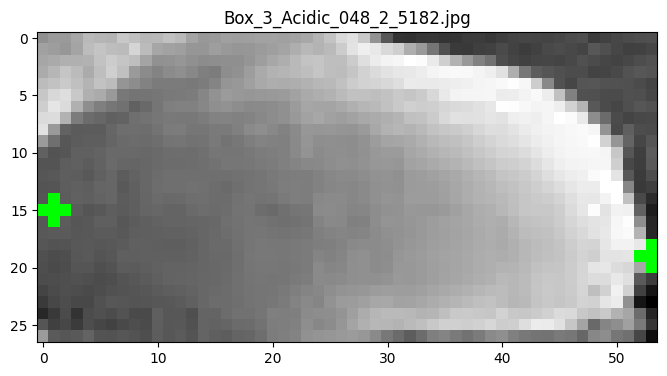

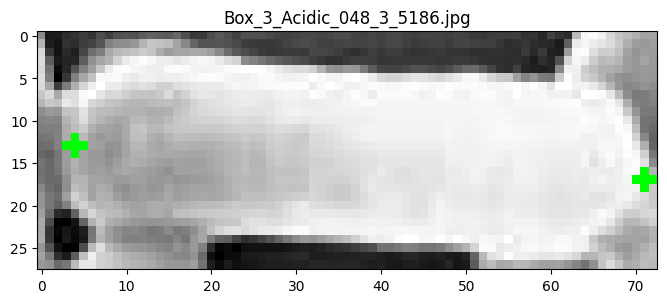

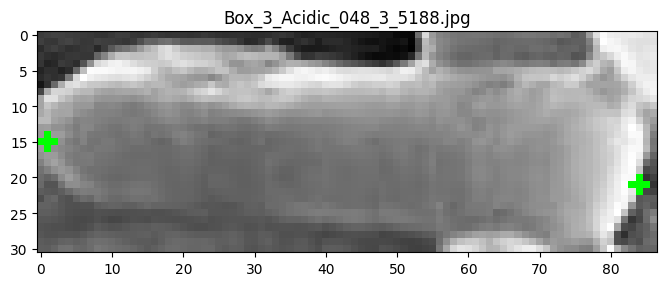

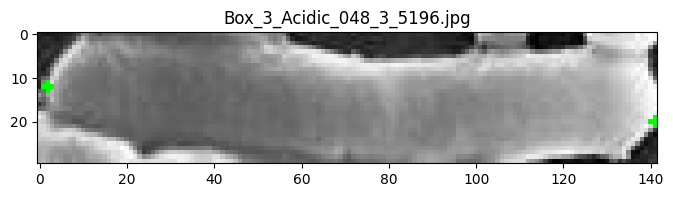

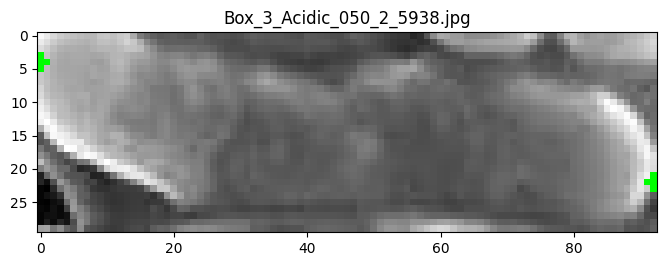

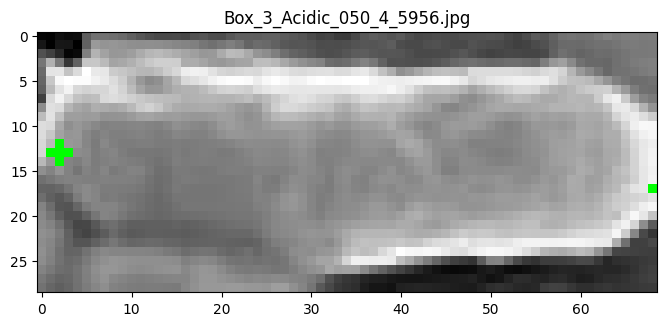

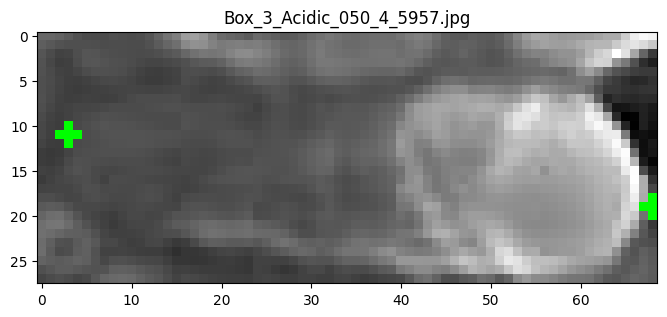

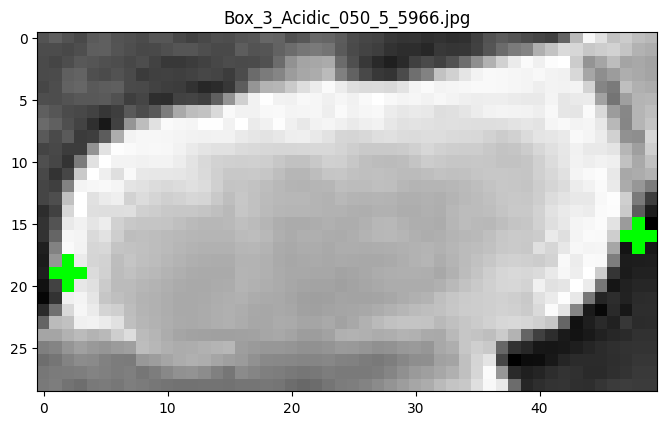

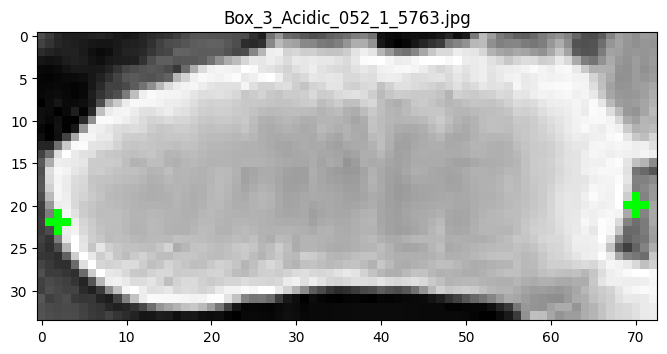

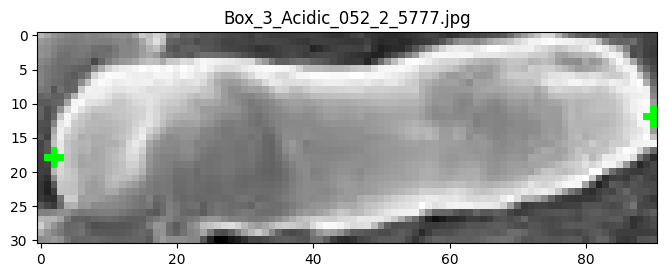

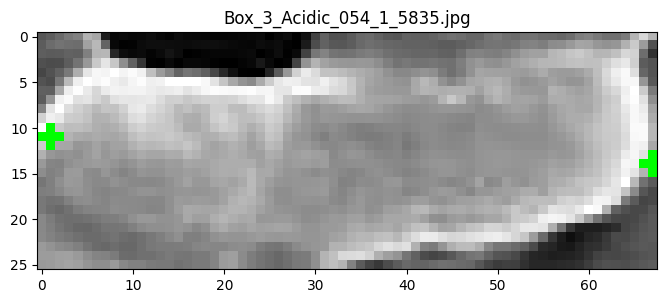

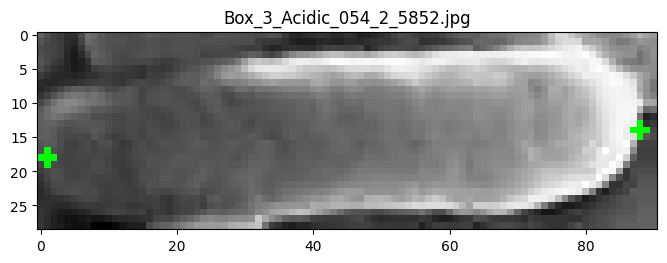

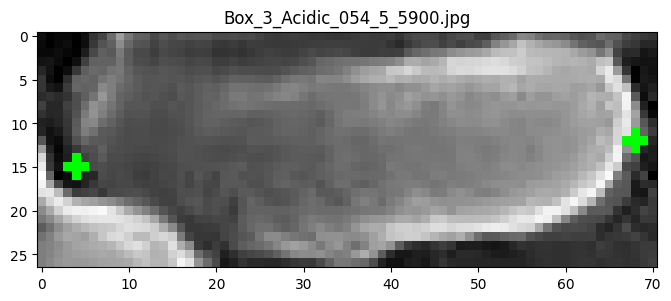

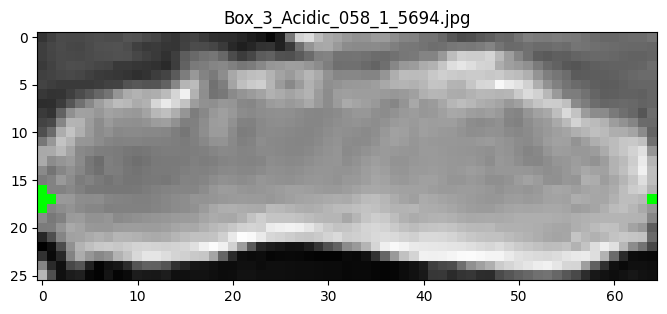

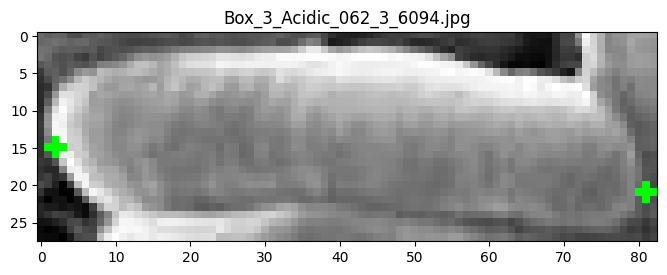

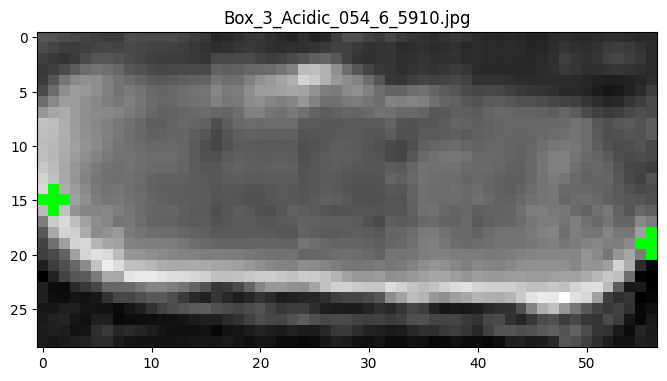

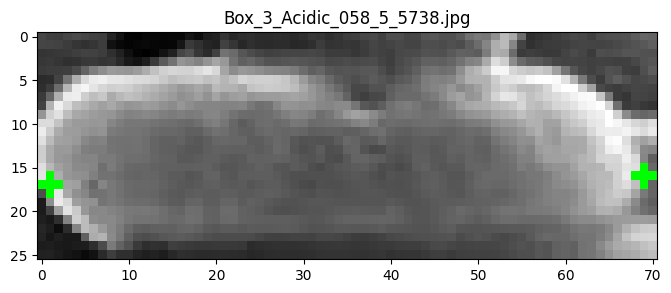

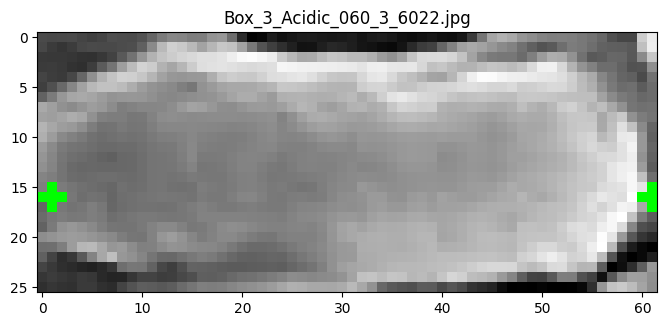

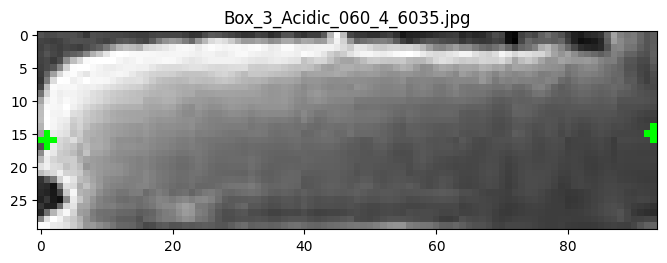

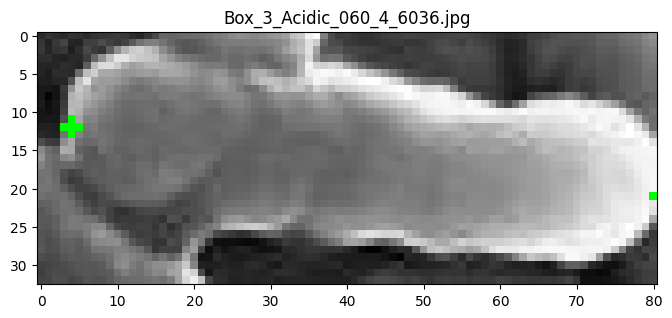

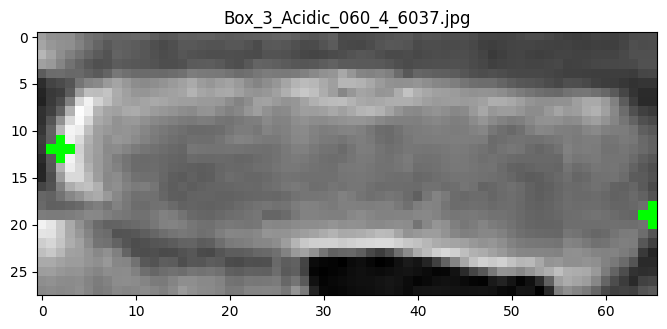

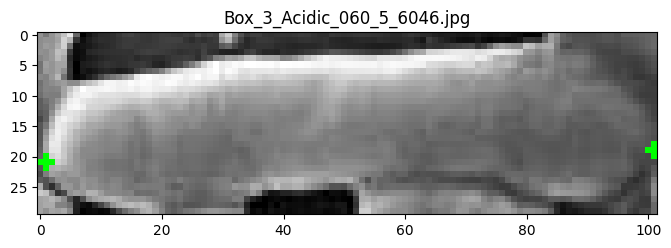

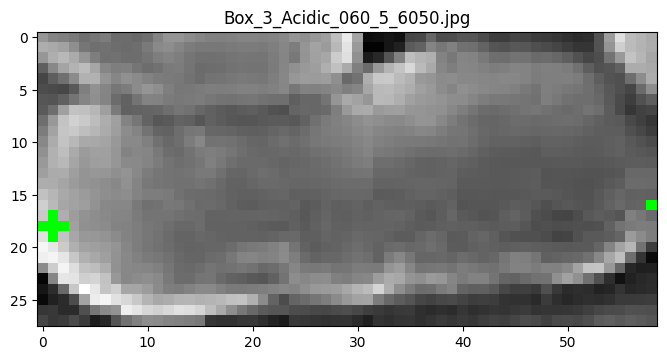

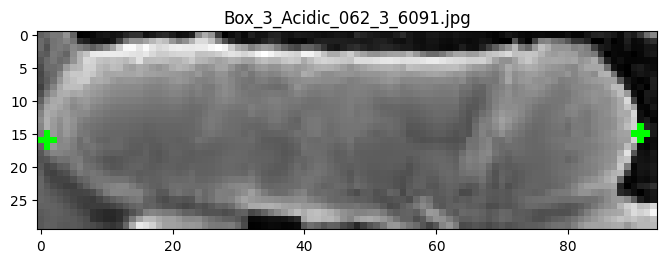

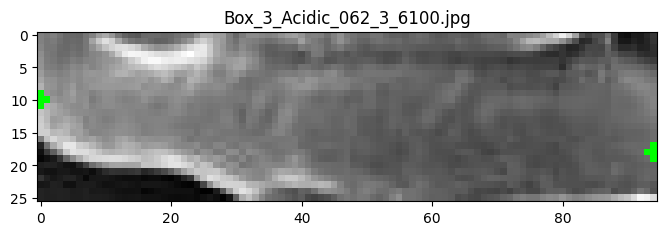

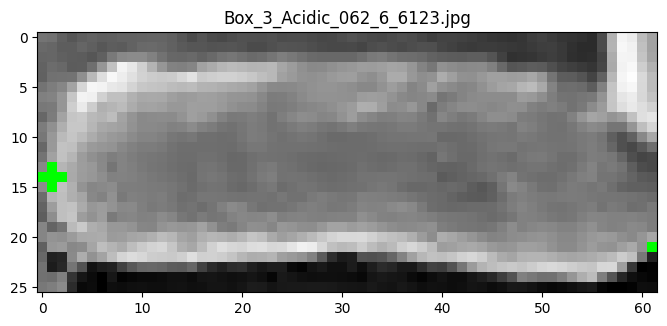

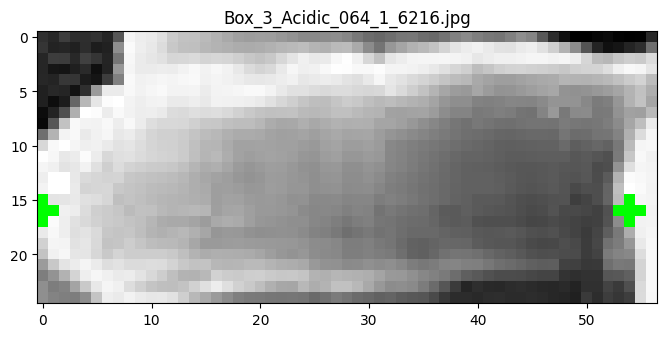

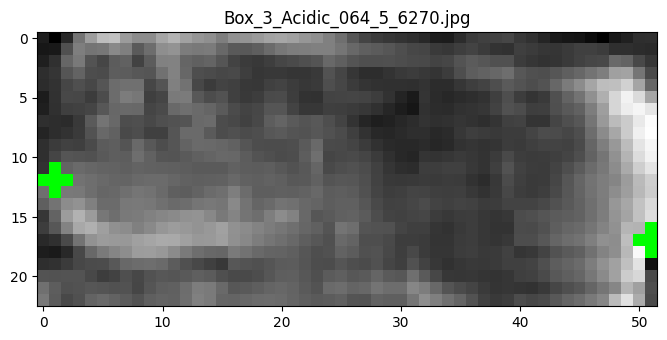

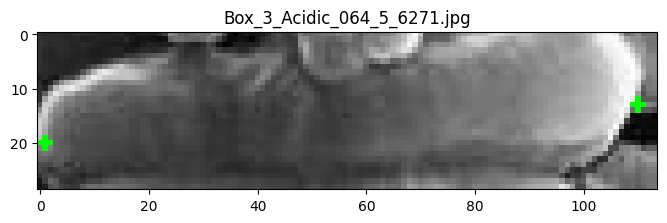

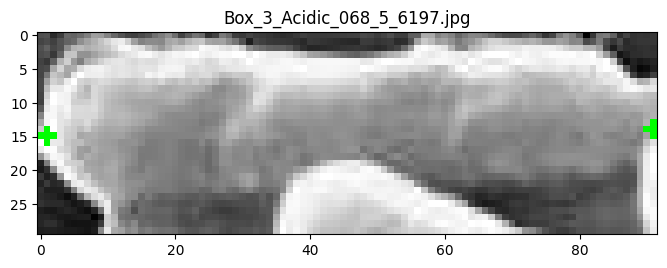

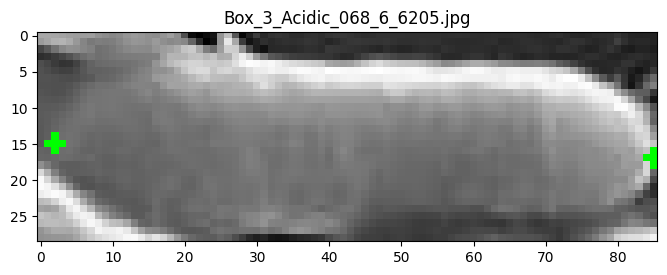

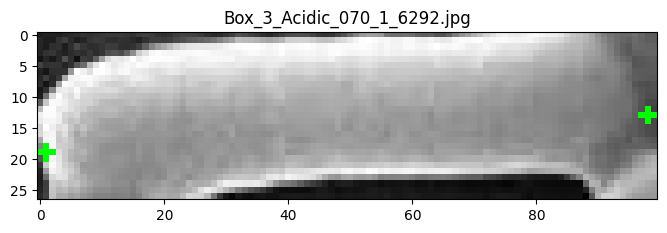

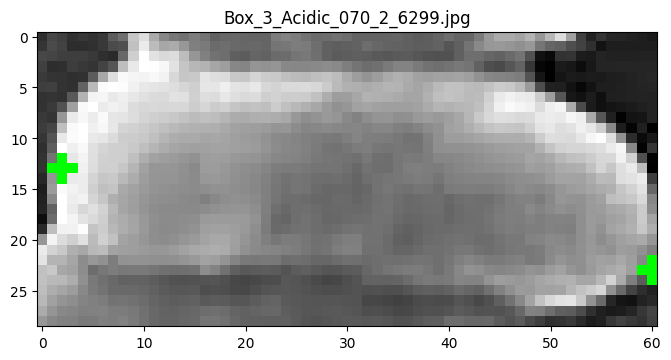

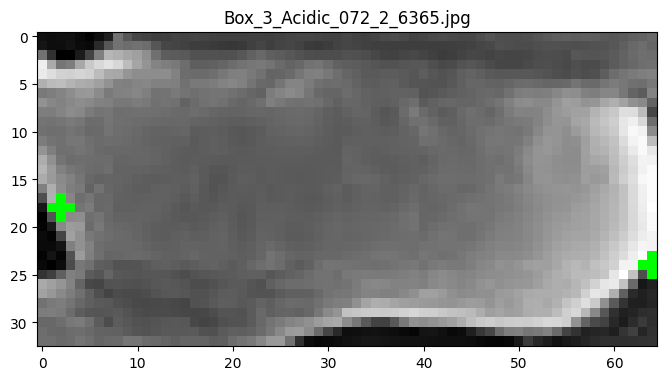

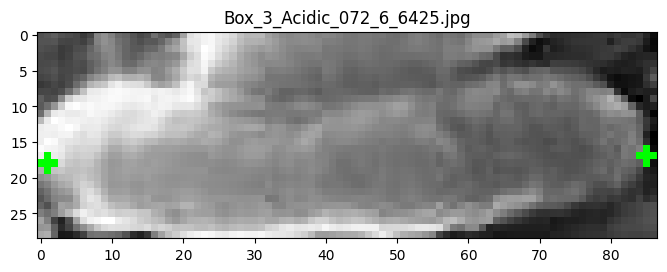

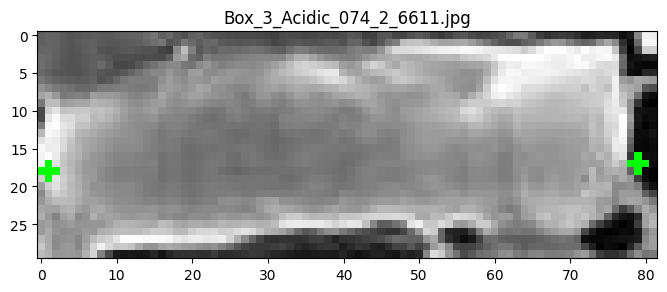

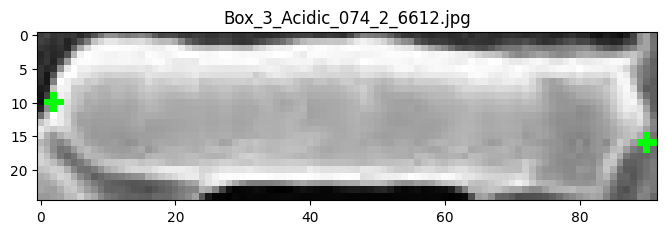

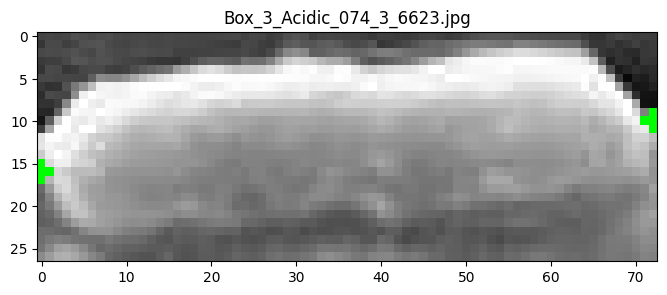

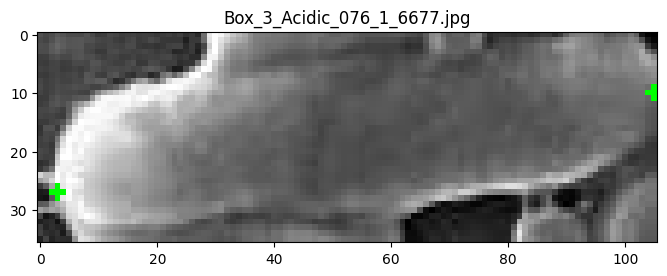

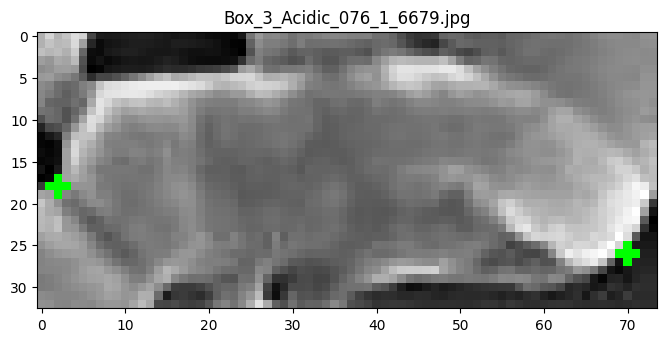

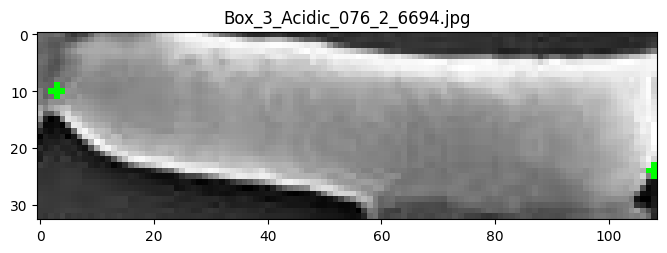

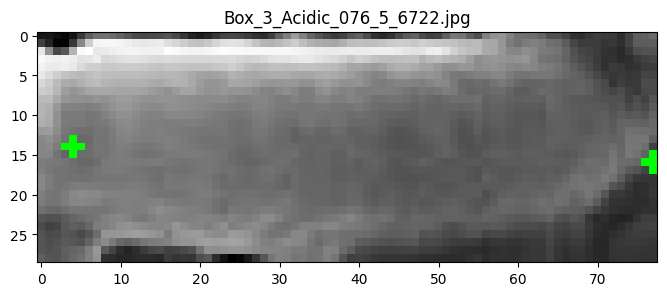

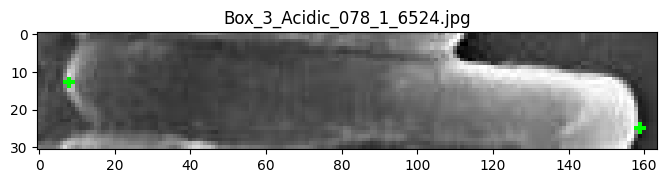

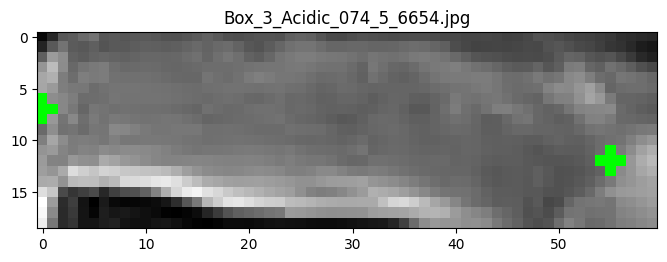

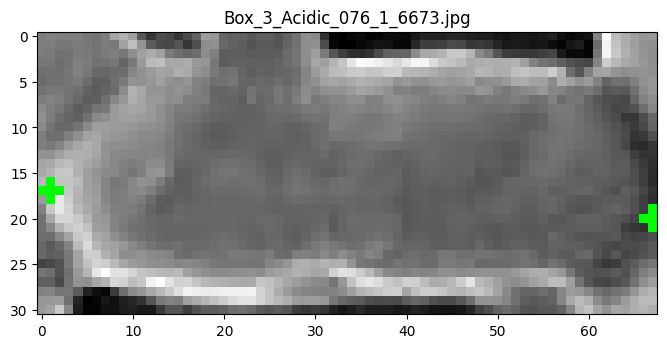

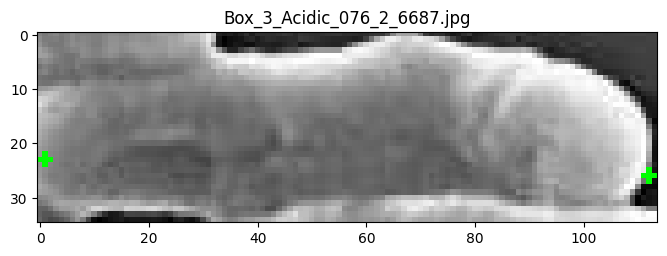

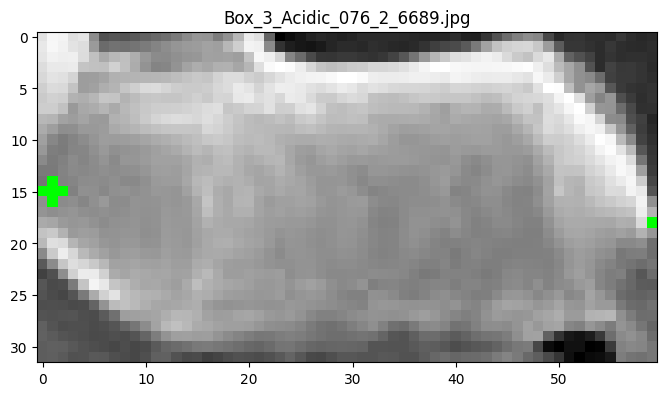

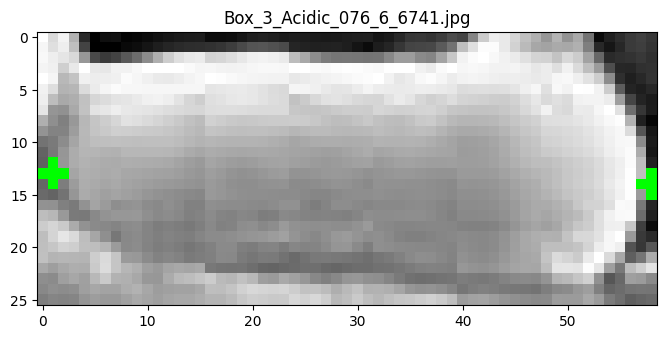

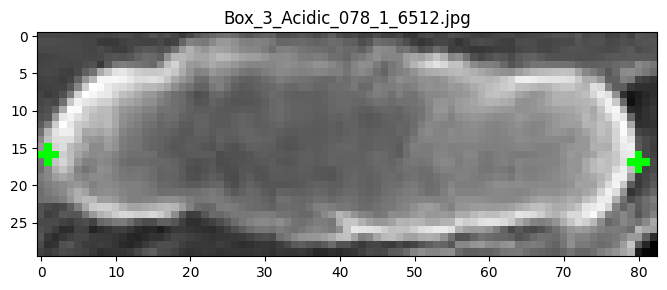

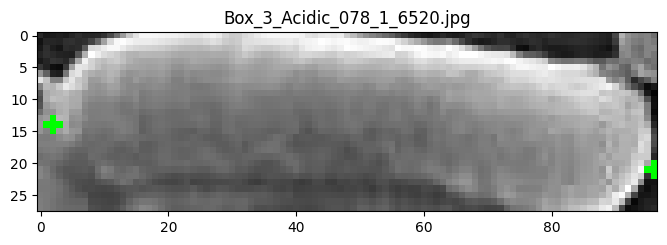

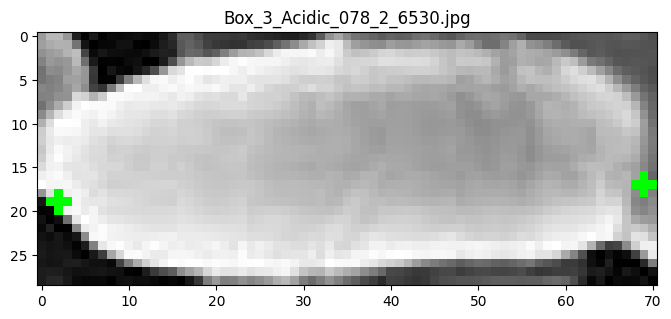

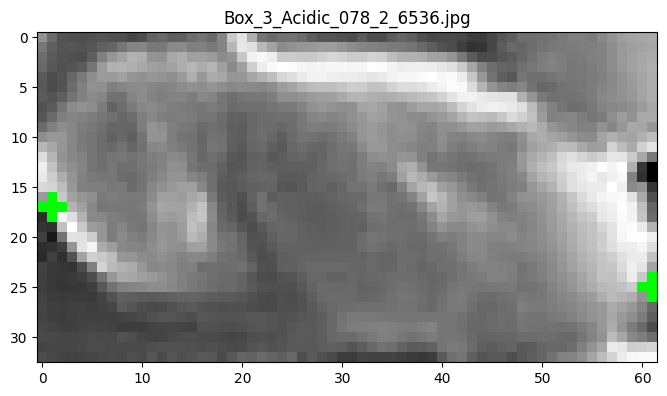

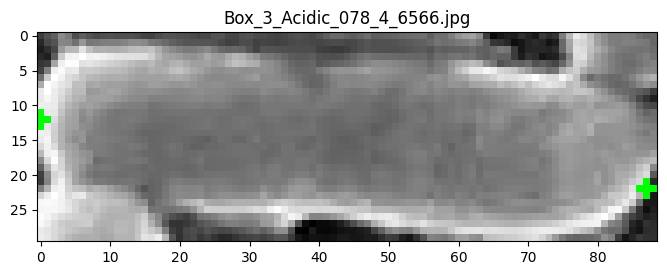

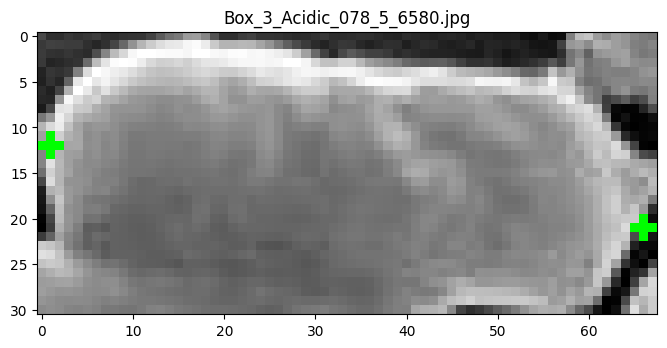

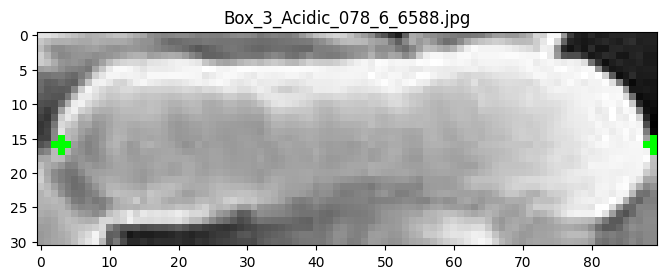

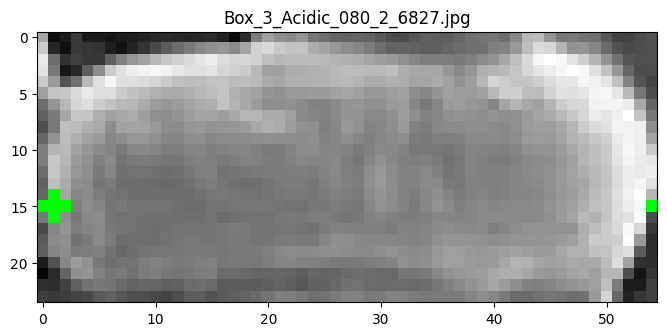

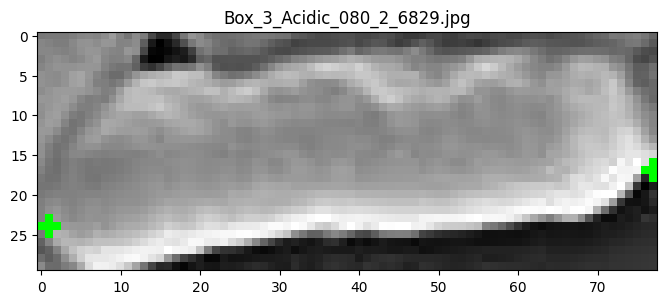

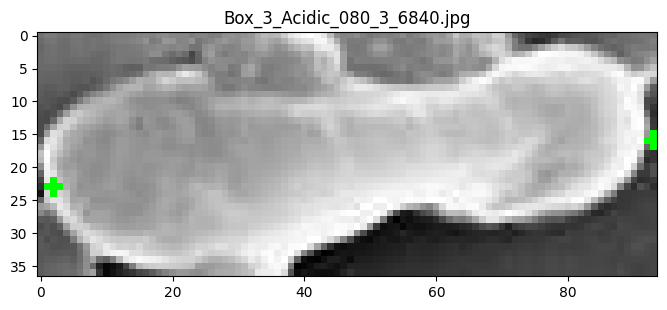

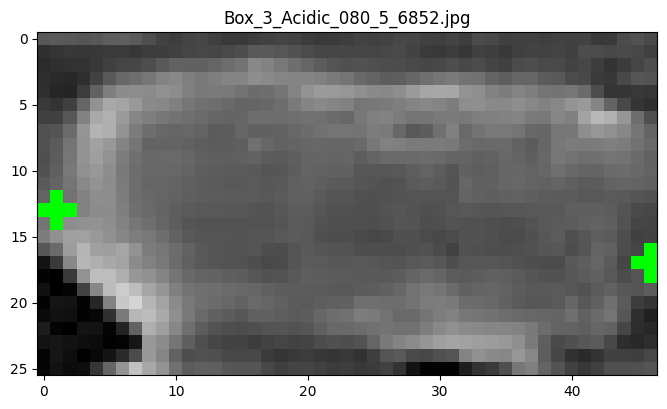

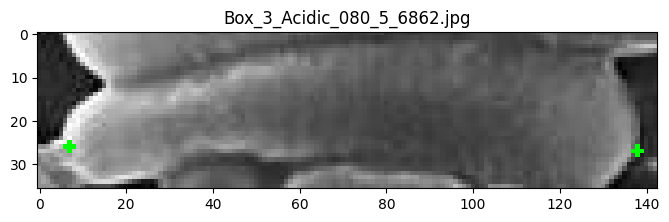

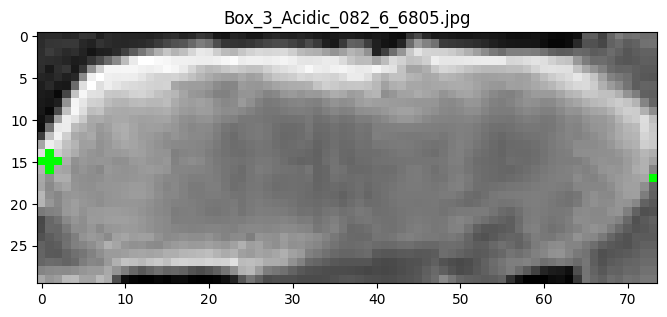

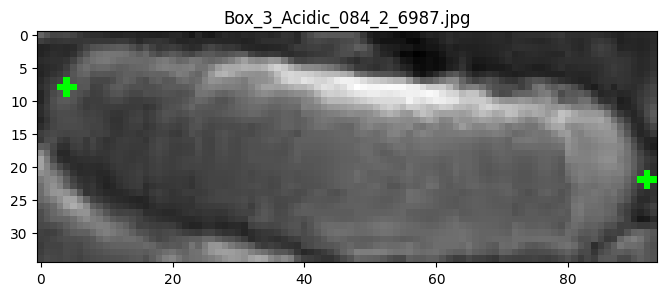

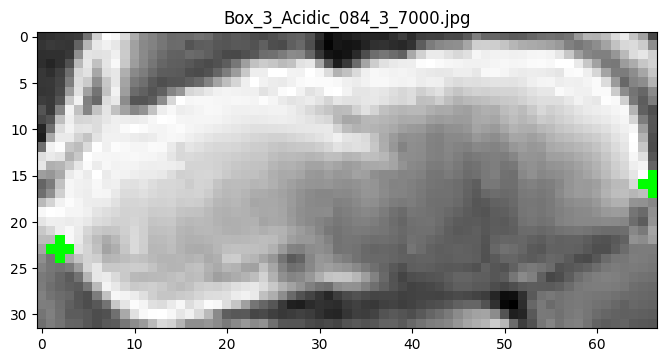

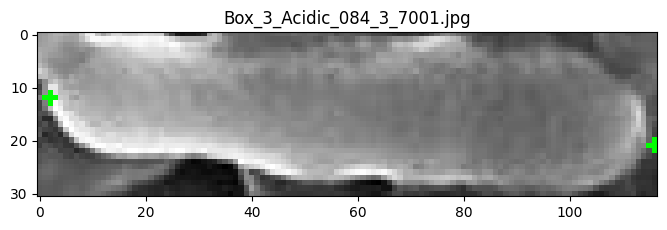

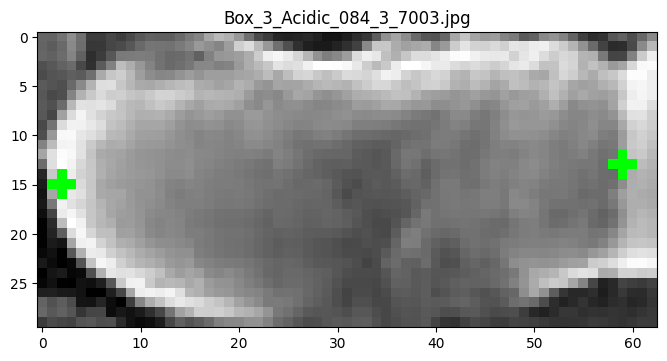

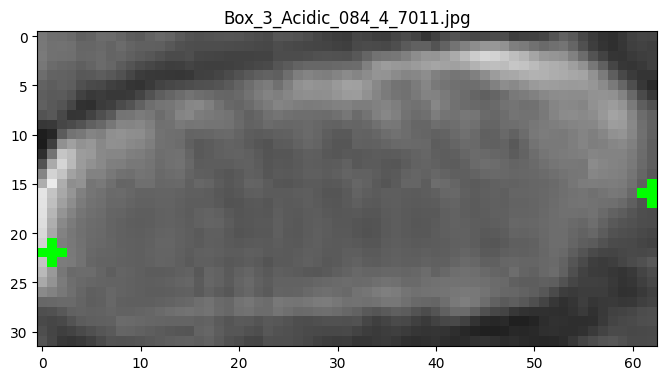

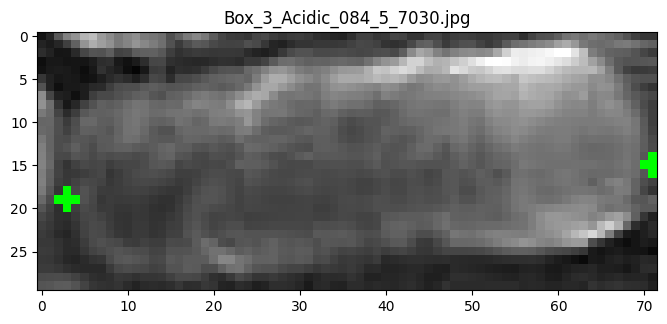

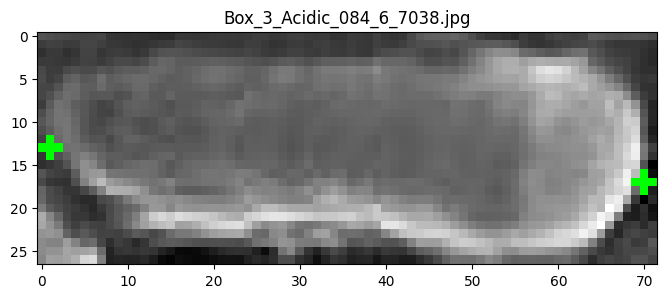

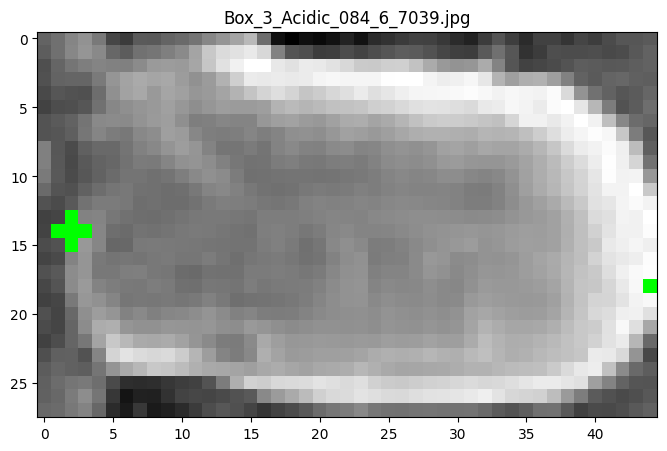

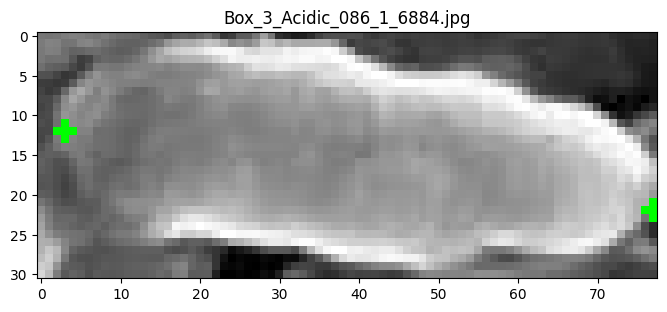

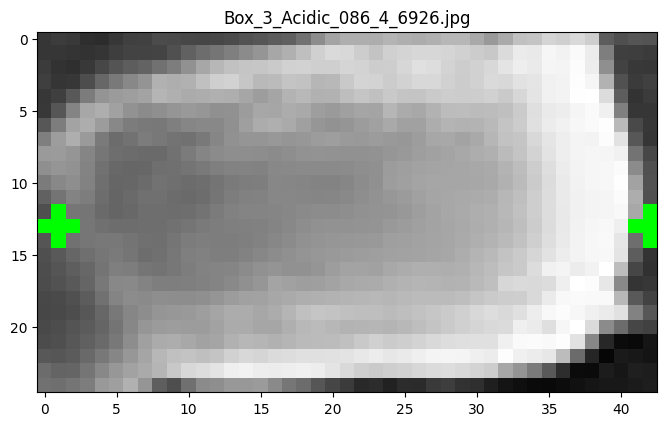

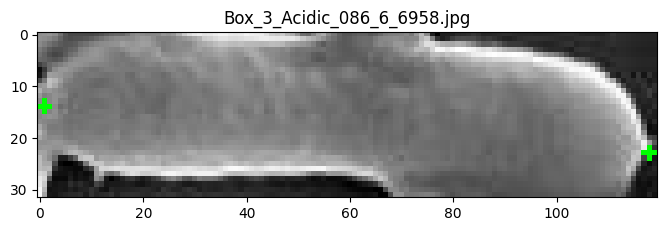

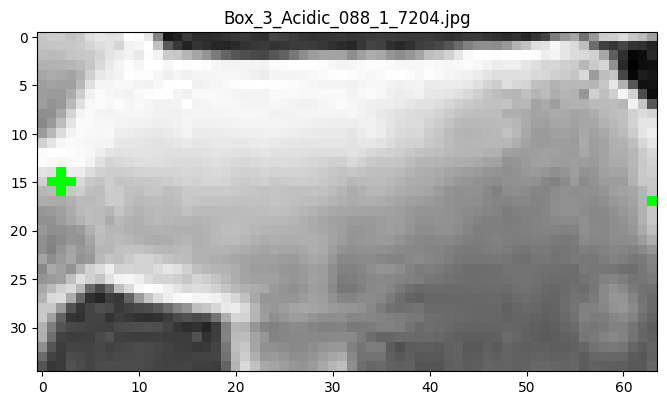

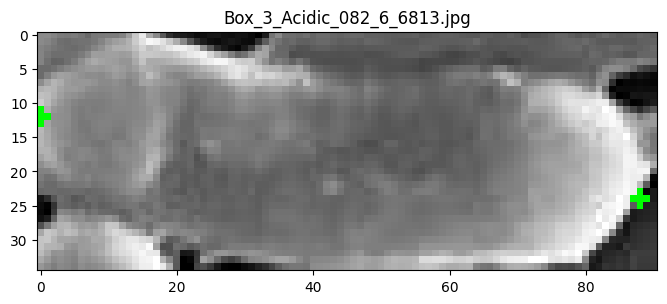

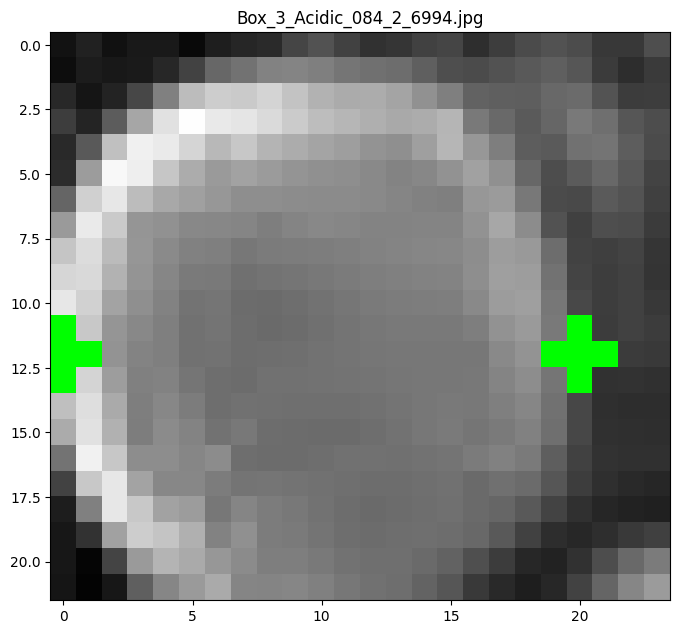

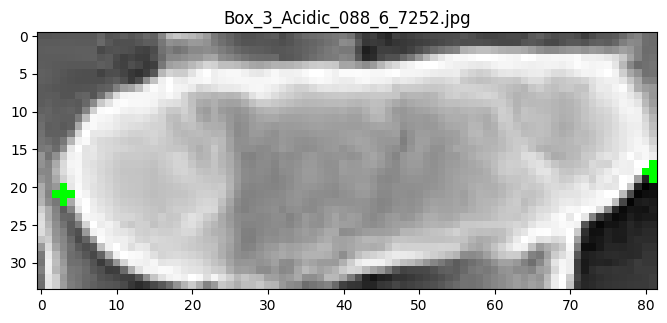

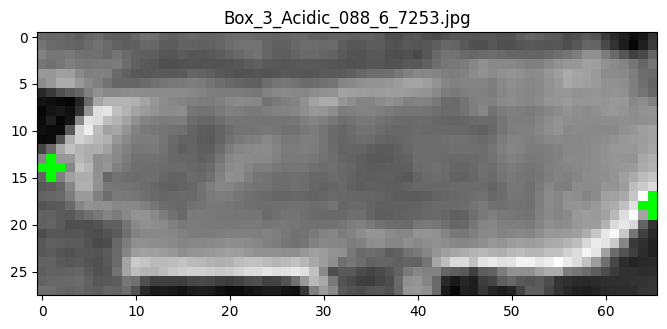

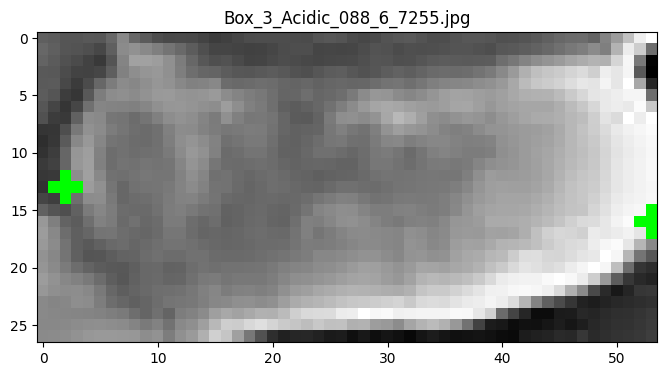

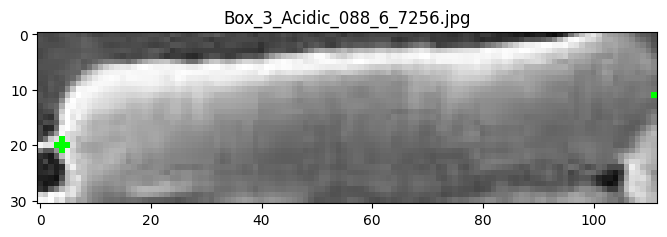

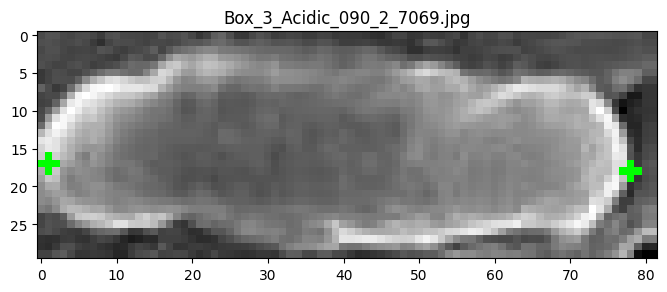

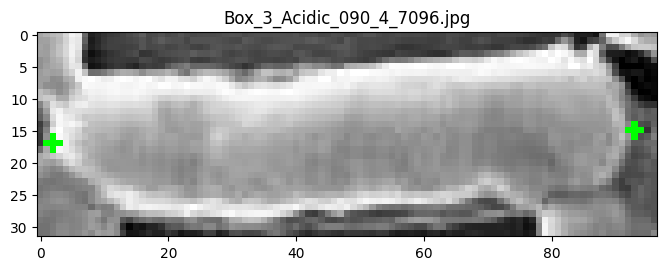

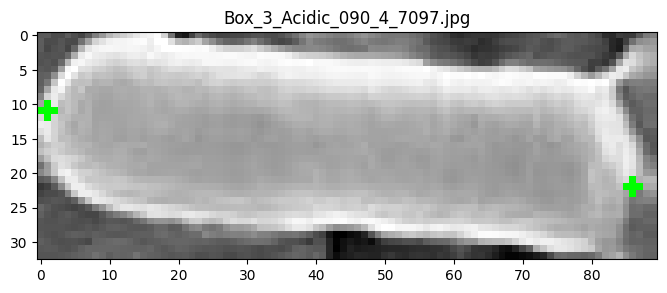

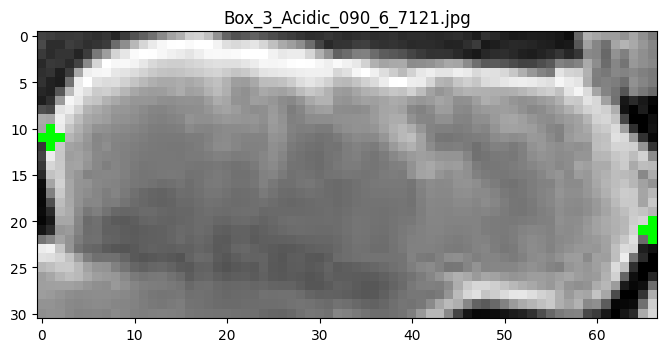

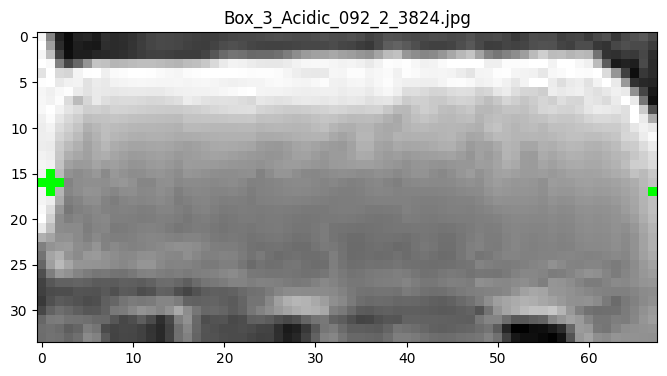

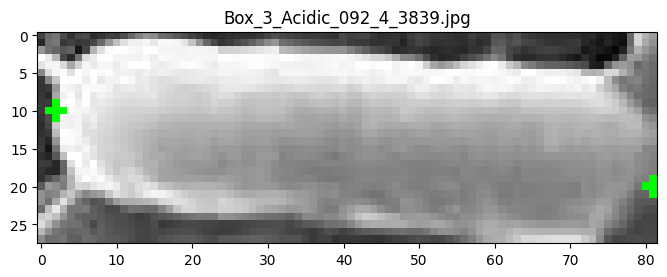

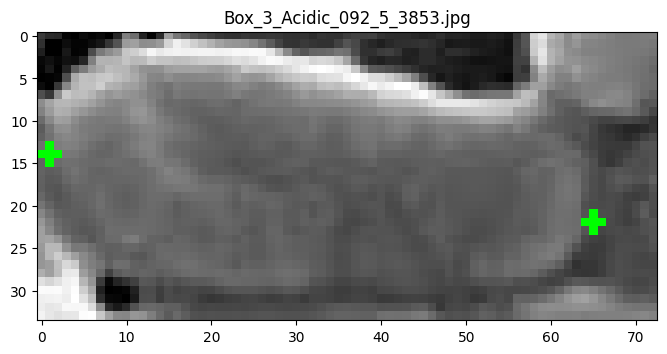

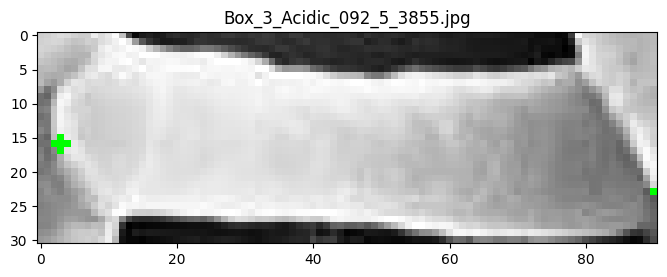

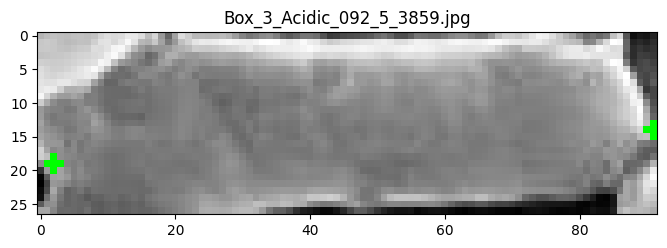

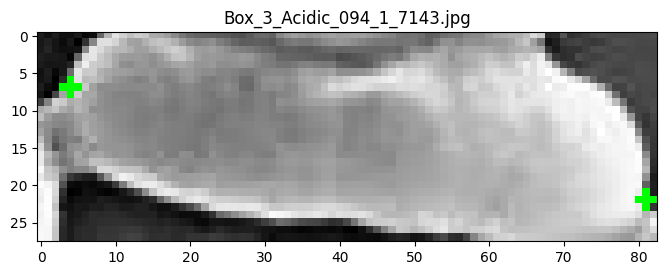

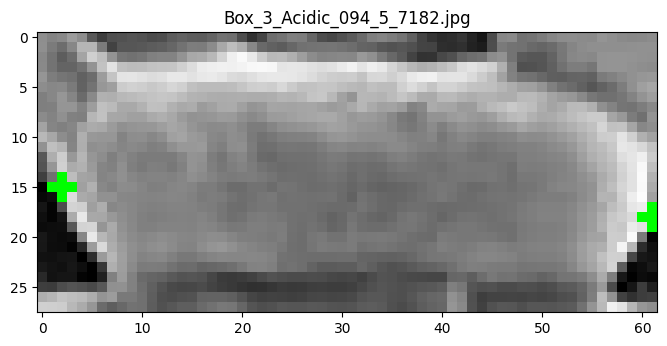

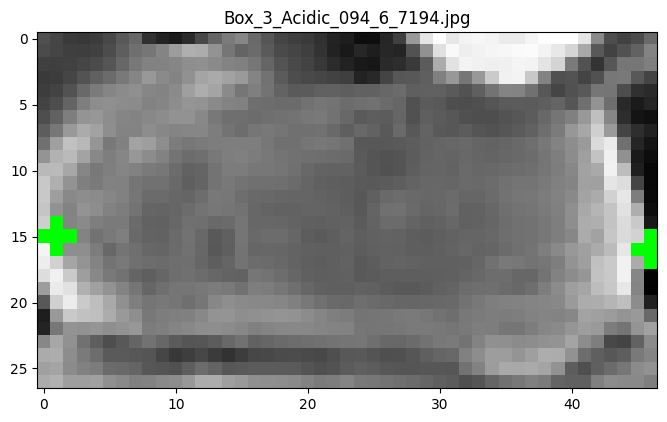

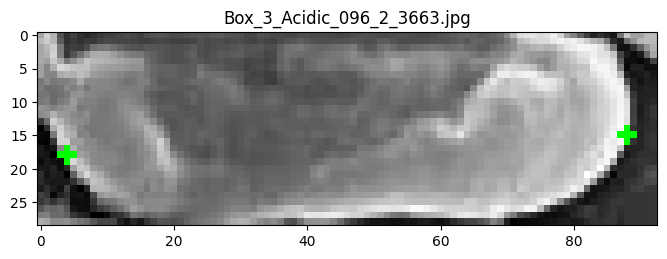

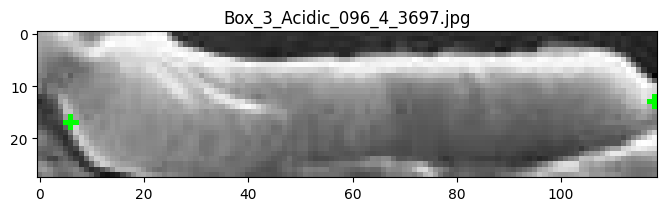

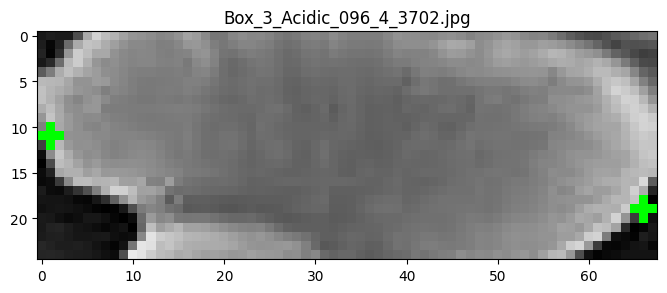

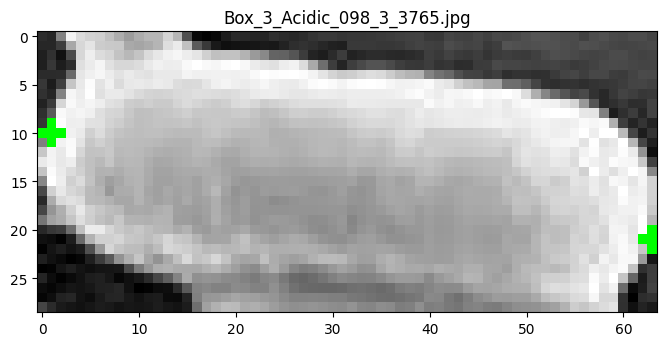

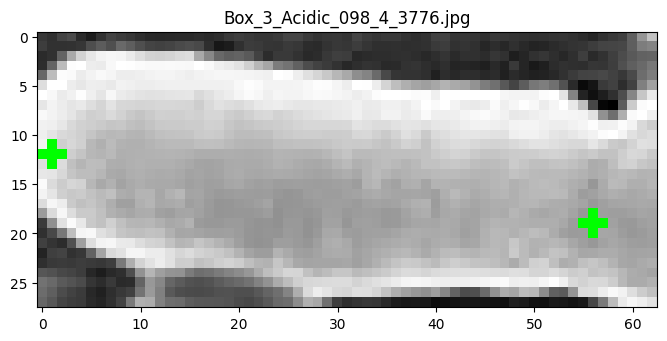

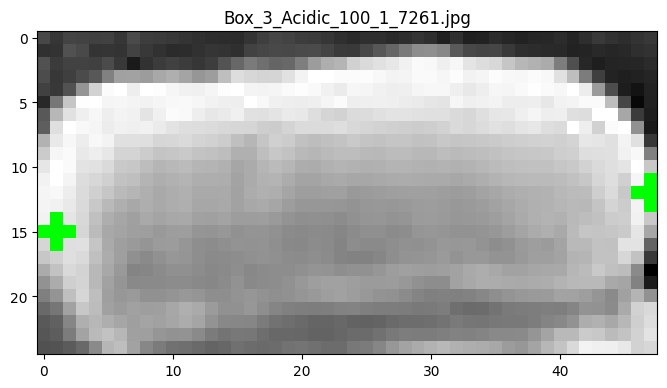

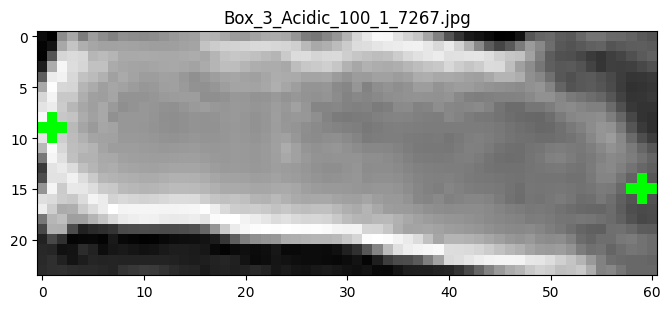

In [8]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import json

# Parse the points and store them in a dictionary
points_dict = {}
for index, row in df.iterrows():
    filename = row['filename']
    shape_attributes = eval(row['region_shape_attributes'])
    cx, cy = shape_attributes['cx'], shape_attributes['cy']
    if filename not in points_dict:
        points_dict[filename] = []
    points_dict[filename].append((cx, cy))

# Print the points dictionary for debugging
print("Points Dictionary:", points_dict)

# Save the points dictionary to a JSON file for future reference
points_dict_path = '/content/drive/MyDrive/parsed_points.json'
with open(points_dict_path, 'w') as f:
    json.dump(points_dict, f)

# Annotate images with points
def annotate_images(images_path, points_dict):
    for filename, points in points_dict.items():
        image_path = os.path.join(images_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            for (cx, cy) in points:
                cv2.circle(image, (cx, cy), 1, (0, 255, 0), -1)
            plt.figure(figsize=(8, 8))
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title(filename)
            plt.show()
        else:
            print(f"Image {filename} not found in {images_path}")

# Annotate and display images
annotate_images(images_path, points_dict)

This following script preprocesses a set of images and their associated coordinate points for use in a machine learning model. It starts by defining a `preprocess_image` function, which first pads each image with black pixels to make it square, ensuring that the original aspect ratio is preserved. The padded image is then resized to 224x224 pixels and normalized by scaling pixel values to the range [0, 1]. The script then iterates through a dictionary of filenames and their corresponding points, loading and preprocessing each image. The original image sizes are stored, and the points are flattened to match the expected model output.

Once preprocessing is complete, the images and points are converted into numpy arrays. The data is then split into training, validation, and test sets using `train_test_split`. Specifically, 80% of the data is used for training, and the remaining 20% is split evenly between validation and test sets. This ensures that the model can be trained, validated, and tested on separate subsets of the data. The script concludes by printing the shapes of these datasets to confirm the split, giving insight into the number of images and points in each set.

In [9]:
from sklearn.model_selection import train_test_split

# Define the preprocess_image function
def preprocess_image(image):
    h, w, _ = image.shape
    max_dim = max(h, w)
    padded_image = np.zeros((max_dim, max_dim, 3), dtype=np.uint8)
    padded_image[:h, :w, :] = image

    resized_image = cv2.resize(padded_image, (224, 224))
    processed_image = resized_image.astype(np.float32) / 255.0  # Normalize

    return processed_image

# Load images and preprocess them
images = []
points = []
original_image_sizes = []  # List to store original image sizes

for filename, pts in points_dict.items():
    image_path = os.path.join(images_path, filename)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image {filename} not found at {image_path}")
        continue
    original_image_sizes.append(image.shape[:2])  # Store original size (height, width)
    processed_image = preprocess_image(image)
    images.append(processed_image)
    points.append(np.array(pts).flatten())  # Flatten the points to match model output

# Convert lists to numpy arrays
images = np.array(images)
points = np.array(points)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(images, points, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Validation set: X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"Test set: X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Training set: X_train shape: (240, 224, 224, 3), y_train shape: (240, 4)
Validation set: X_val shape: (30, 224, 224, 3), y_val shape: (30, 4)
Test set: X_test shape: (30, 224, 224, 3), y_test shape: (30, 4)


This script sets up and trains a deep learning model using TensorFlow and Keras. It starts by defining a model architecture based on MobileNetV2, a pre-trained convolutional neural network. The MobileNetV2 base model is loaded with ImageNet weights and configured as trainable, though typically, one might freeze its layers to retain learned features and only train the added layers. The model is designed to accept images of size 224x224 pixels and includes additional layers for feature extraction and regression.

The model is constructed with two dense layers, each with 256 units and Leaky ReLU activation to introduce non-linearity while avoiding dead neurons. A dropout layer with a rate of 0.2 is added to prevent overfitting. The final output layer has four units, corresponding to the coordinates of the predicted points. The model is compiled with the Adam optimizer, a learning rate of 0.0001, and mean squared error as the loss function, which is suitable for regression tasks.

The script includes an early stopping callback to halt training if the validation loss does not improve for 30 epochs, and to restore the best weights. Data augmentation is applied during training to enhance model generalization, involving various transformations such as rotations, shifts, and flips. The model is then trained using augmented data, with training and validation losses plotted to visualize performance over epochs.

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Define your model
base_model = keras.applications.MobileNetV2(
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False,
)
base_model.trainable = True  # Make base model trainable

inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=True)
x = keras.layers.GlobalAveragePooling2D()(x)

# First dense layer with 256 units and Leaky ReLU activation
x = keras.layers.Dense(256)(x)
x = keras.layers.LeakyReLU(alpha=0.01)(x)

# Second dense layer with 256 units and Leaky ReLU activation
x = keras.layers.Dense(256)(x)
x = keras.layers.LeakyReLU(alpha=0.01)(x)

x = keras.layers.Dropout(0.2)(x)  # dropout rate = 0.2
outputs = keras.layers.Dense(4)(x)  # 4 outputs (x1, y1, x2, y2)
model = keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Keep learning rate
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

# Print model summary
model.summary()

# Data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    epochs=30,
                    validation_data=(X_val, y_val))

# Plot the training and validation MSE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Mean Squared Error Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,652,740 (10.12 MB)

 Trainable params: 2,618,628 (9.99 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 49s 341ms/step - loss: 1746.7426 - mean_squared_error: 1746.7426 - val_loss: 1340.1947 - val_mean_squared_error: 1340.1947
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 1410.6543 - mean_squared_error: 1410.6543 - val_loss: 998.9967 - val_mean_squared_error: 998.9967
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 956.9075 - mean_squared_error: 956.9075 - val_loss: 436.9163 - val_mean_squared_error: 436.9163
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 421.1754 - mean_squared_error: 421.1754 - val_loss: 78.6023 - val_mean_squared_error: 78.6023
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 77.5954 - mean_squared_error: 77.5954 - val_loss: 125.3907 - val_mean_squared_error: 125.3907
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 58.7672 - mean_squared_error: 58.7672 - val_loss: 141.8379 - val_mean_squared_error: 141.8379
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 63.

Showing the differences between the predicted and actual points The results seem close but not accurate enough. I will try work on it on the future

In [16]:
import os
import cv2
import numpy as np
import json

# Function to preprocess the image (resize and normalize)
def preprocess_image(image):
    h, w, _ = image.shape
    max_dim = max(h, w)
    padded_image = np.zeros((max_dim, max_dim, 3), dtype=np.uint8)
    padded_image[:h, :w, :] = image

    resized_image = cv2.resize(padded_image, (224, 224))
    processed_image = resized_image.astype(np.float32) / 255.0  # Normalize

    return processed_image

# Function to draw points on an image (not used in this version)
def draw_points(image, points, color):
    for (x, y) in points:
        cv2.circle(image, (int(x), int(y)), 1, color, -1)  # Increase the circle size for better visibility
    return image

# Path to the images and points dictionary
images_path = "/content/drive/MyDrive/horizontal_bateria"
points_dict_path = '/content/drive/MyDrive/parsed_points.json'

# Load points dictionary
with open(points_dict_path, 'r') as f:
    points_dict = json.load(f)

# Preprocess test images
test_images = []
original_test_image_sizes = []  # List to store original test image sizes
actual_points_list = []  # List to store actual points

for filename, pts in points_dict.items():
    image_path = os.path.join(images_path, filename)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image {filename} not found at {image_path}")
        continue
    original_test_image_sizes.append(image.shape[:2])  # Store original size (height, width)
    processed_image = preprocess_image(image)
    test_images.append(processed_image)
    actual_points_list.append(np.array(pts))  # Store actual points

# Convert lists to numpy arrays
test_images = np.array(test_images)

# Predict using the model (assuming your model is named 'model' and is already trained)
predictions = model.predict(test_images)

# Print the predicted and actual points
for i, (filename, original_size) in enumerate(zip(points_dict.keys(), original_test_image_sizes)):
    # Rescale predicted points to original image size and convert to integers
    predicted_points = predictions[i].reshape(-1, 2)
    h, w = original_size
    predicted_points[:, 0] = (predicted_points[:, 0] * w / 224).astype(int)
    predicted_points[:, 1] = (predicted_points[:, 1] * h / 224).astype(int)

    # Rescale actual points to original image size and convert to integers
    actual_points = actual_points_list[i].astype(np.float64)
    actual_points[:, 0] = (actual_points[:, 0] * w / 224).astype(int)
    actual_points[:, 1] = (actual_points[:, 1] * h / 224).astype(int)

    # Print predicted and actual points
    print(f"Filename: {filename}")
    print(f"Predicted points: {predicted_points.tolist()}")
    print(f"Actual points: {actual_points.tolist()}")
    print()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Filename: Box_2_Acidic_022_5_641.jpg
Predicted points: [[0.0, 1.0], [19.0, 1.0]]
Actual points: [[0.0, 1.0], [23.0, 2.0]]

Filename: Box_2_Acidic_028_1_918.jpg
Predicted points: [[0.0, 1.0], [27.0, 1.0]]
Actual points: [[1.0, 1.0], [30.0, 2.0]]

Filename: Box_2_Acidic_032_4_1021.jpg
Predicted points: [[0.0, 1.0], [19.0, 1.0]]
Actual points: [[0.0, 2.0], [19.0, 2.0]]

Filename: Box_2_Acidic_046_2_1055.jpg
Predicted points: [[0.0, 1.0], [15.0, 1.0]]
Actual points: [[0.0, 1.0], [16.0, 1.0]]

Filename: Box_2_Acidic_052_4_1678.jpg
Predicted points: [[0.0, 1.0], [13.0, 1.0]]
Actual points: [[0.0, 1.0], [15.0, 1.0]]

Filename: Box_2_Acidic_056_6_1363.jpg
Predicted points: [[0.0, 1.0], [10.0, 1.0]]
Actual points: [[0.0, 2.0], [11.0, 1.0]]

Filename: Box_2_Acidic_060_2_1887.jpg
Predicted points: [[0.0, 1.0], [15.0, 1.0]]
Actual points: [[0.0, 3.0], [18.0, 1.0]]

Filename: Box_2_Acidic_062_1_2725.jpg
Predicted points: [[0.0, 1.0], [28.0, 1.0]]
Actual point